# Housing Price Prediction Project
This notebook analyzes the Ames Housing dataset and builds ML models to predict house prices.

## Contents
- Introduction
- Import Libraries
- Load Dataset
- EDA
- Feature Engineering
- Model Training
- Evaluation Metrics
- Conclusion


# Import Liabiraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score ,mean_squared_error
from sklearn.model_selection import GridSearchCV

# Data Import + EDA Process

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv("ames iowa housing.csv")

In [4]:
df.head(20)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       RL          NaN    12968   Pave   NaN      IR2   
13  14          20       RL         91.0    10652   Pave   NaN      IR1   
14  15          20       RL          NaN    10920   Pave   NaN      IR1   
15  16          45       RM         51.0     6120   Pave   NaN      Reg   
16  17          20       RL          NaN    11241   Pave   NaN      IR1   
17  18          90       RL         72.0    10791   Pave   NaN      Reg   
18  19          20       RL         66.0    13695   Pave   NaN      Reg   
19  20          20       RL         70.0     7560   Pave   NaN      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9          Lvl    AllPub    Corner       Gtl      BrkSide     Artery   
10         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
11         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
12         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
13         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
14         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
15         Lvl    AllPub    Corner       Gtl      BrkSide       Norm   
16         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
17         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
18         Lvl    AllPub    Inside       Gtl      SawyerW       RRAe   
19         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            5       2003   
1        Norm     1Fam     1Story            6            8       1976   
2        Norm     1Fam     2Story            7            5       2001   
3        Norm     1Fam     2Story            7            5       1915   
4        Norm     1Fam     2Story            8            5       2000   
5        Norm     1Fam     1.5Fin            5            5       1993   
6        Norm     1Fam     1Story            8            5       2004   
7        Norm     1Fam     2Story            7            6       1973   
8        Norm     1Fam     1.5Fin            7            5       1931   
9      Artery   2fmCon     1.5Unf            5            6       1939   
10       Norm     1Fam     1Story            5            5       1965   
11       Norm     1Fam     

In [5]:
for col in df.columns:
    print(col, df[col].isnull().sum())


Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 872
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrS

In [6]:
for col in df.columns:
    print(col, df[col].dtypes)


Id int64
MSSubClass int64
MSZoning object
LotFrontage float64
LotArea int64
Street object
Alley object
LotShape object
LandContour object
Utilities object
LotConfig object
LandSlope object
Neighborhood object
Condition1 object
Condition2 object
BldgType object
HouseStyle object
OverallQual int64
OverallCond int64
YearBuilt int64
YearRemodAdd int64
RoofStyle object
RoofMatl object
Exterior1st object
Exterior2nd object
MasVnrType object
MasVnrArea float64
ExterQual object
ExterCond object
Foundation object
BsmtQual object
BsmtCond object
BsmtExposure object
BsmtFinType1 object
BsmtFinSF1 int64
BsmtFinType2 object
BsmtFinSF2 int64
BsmtUnfSF int64
TotalBsmtSF int64
Heating object
HeatingQC object
CentralAir object
Electrical object
1stFlrSF int64
2ndFlrSF int64
LowQualFinSF int64
GrLivArea int64
BsmtFullBath int64
BsmtHalfBath int64
FullBath int64
HalfBath int64
BedroomAbvGr int64
KitchenAbvGr int64
KitchenQual object
TotRmsAbvGrd int64
Functional object
Fireplaces int64
FireplaceQu object

In [7]:
for col in df.columns:
    print(col,df[col].nunique())

Id 1460
MSSubClass 15
MSZoning 5
LotFrontage 110
LotArea 1073
Street 2
Alley 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 3
MasVnrArea 327
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinSF1 637
BsmtFinType2 6
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 4
FireplaceQu 5
GarageType 6
GarageYrBlt 97
GarageFinish 3
GarageCars 5
GarageArea 441
GarageQual 5
GarageCond 5
PavedDrive 3
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
PoolQC 3
Fence 4
MiscFeature 4
MiscV

In [8]:
numeric_cols = df.select_dtypes(include=['int64','float64'])
categorical_cols = df.select_dtypes(include=['object'])


In [9]:
df['Neighborhood'].value_counts()


Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

<Axes: xlabel='SalePrice', ylabel='Count'>

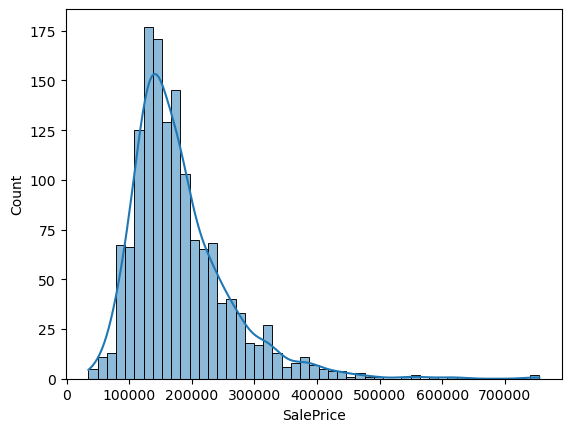

In [10]:
sns.histplot(df['SalePrice'], kde=True)


In [11]:
df.shape

(1460, 81)

In [12]:
target = 'SalePrice'

for col in df.select_dtypes(include=['int64','float64']).columns:
    print(f"{col}: {df[col].corr(df[target])}")


Id: -0.021916719443431106
MSSubClass: -0.08428413512659526
LotFrontage: 0.35179909657067804
LotArea: 0.26384335387140573
OverallQual: 0.7909816005838047
OverallCond: -0.07785589404867801
YearBuilt: 0.5228973328794969
YearRemodAdd: 0.5071009671113865
MasVnrArea: 0.47749304709571594
BsmtFinSF1: 0.38641980624215316
BsmtFinSF2: -0.011378121450215136
BsmtUnfSF: 0.21447910554696892
TotalBsmtSF: 0.6135805515591954
1stFlrSF: 0.6058521846919148
2ndFlrSF: 0.31933380283206764
LowQualFinSF: -0.025606130000679586
GrLivArea: 0.7086244776126522
BsmtFullBath: 0.22712223313149404
BsmtHalfBath: -0.016844154297359023
FullBath: 0.5606637627484456
HalfBath: 0.2841076755947829
BedroomAbvGr: 0.16821315430074
KitchenAbvGr: -0.1359073708421411
TotRmsAbvGrd: 0.5337231555820284
Fireplaces: 0.4669288367515277
GarageYrBlt: 0.48636167748786074
GarageCars: 0.6404091972583531
GarageArea: 0.6234314389183617
WoodDeckSF: 0.3244134445681295
OpenPorchSF: 0.31585622711605543
EnclosedPorch: -0.1285779579259565
3SsnPorch: 0.

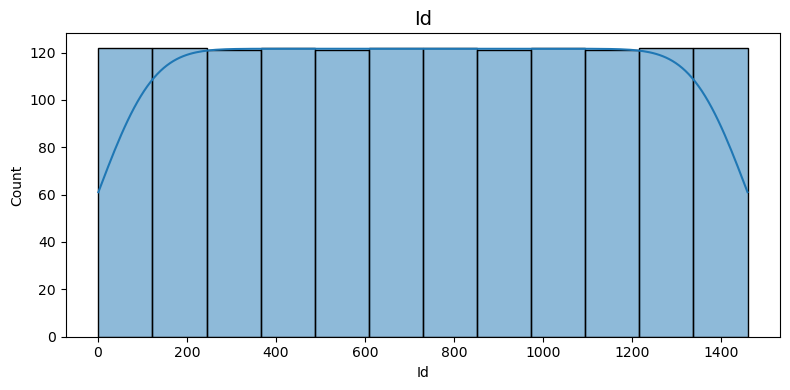

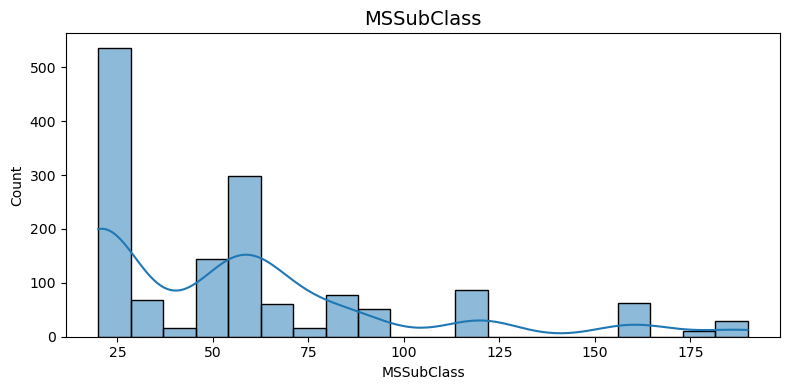

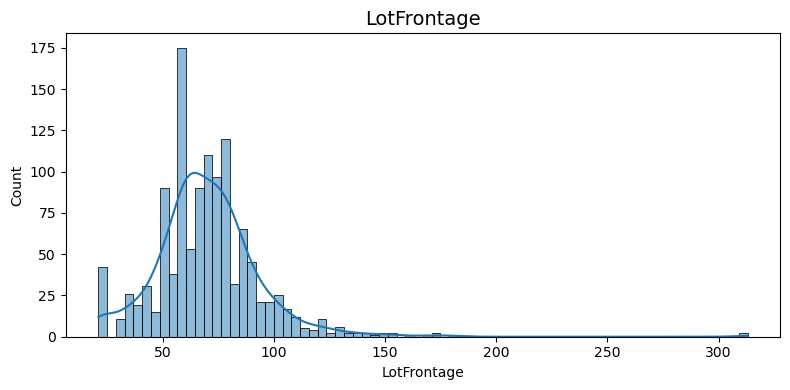

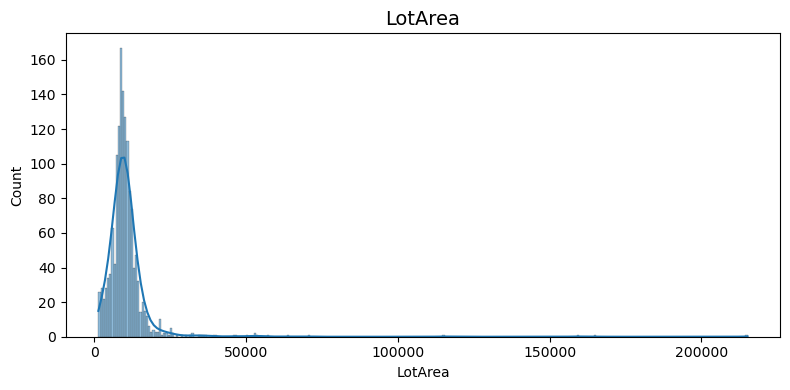

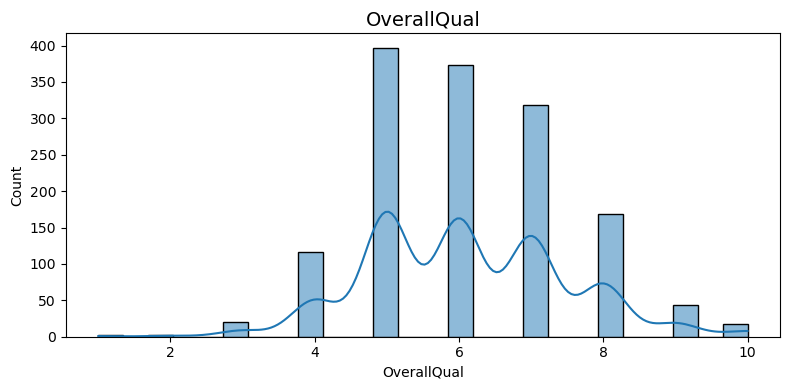

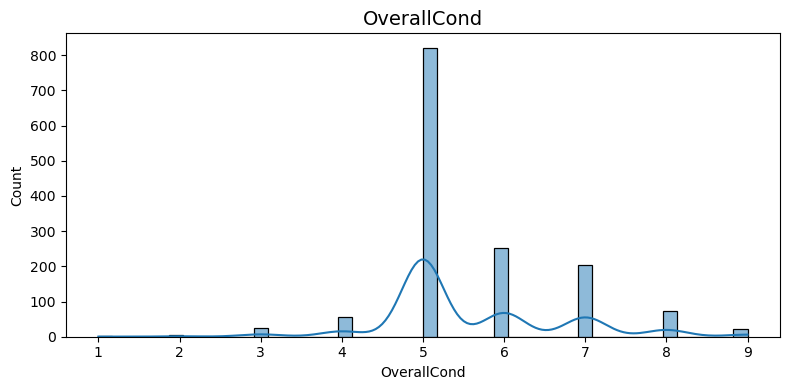

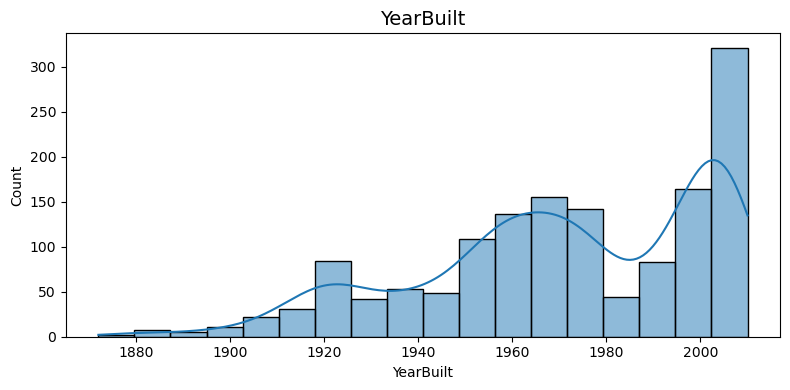

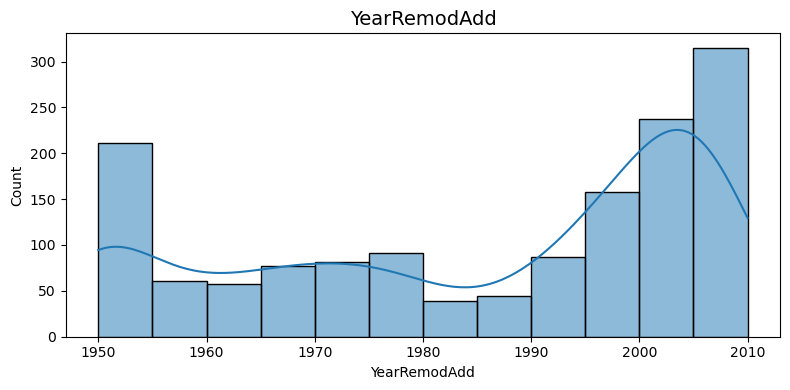

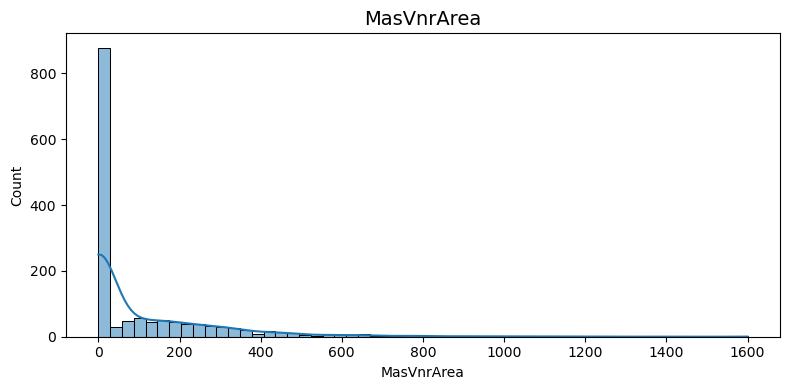

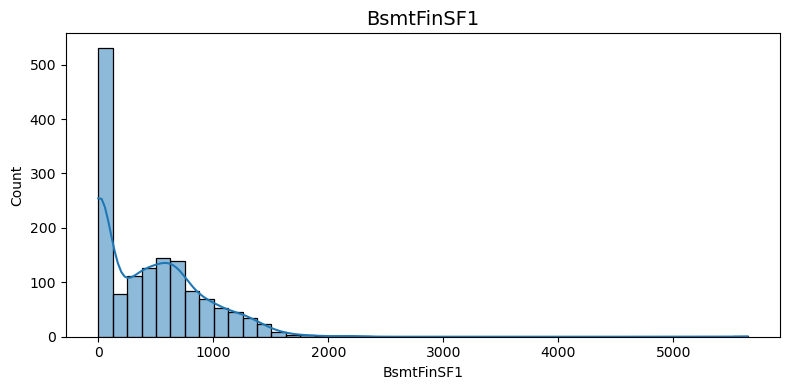

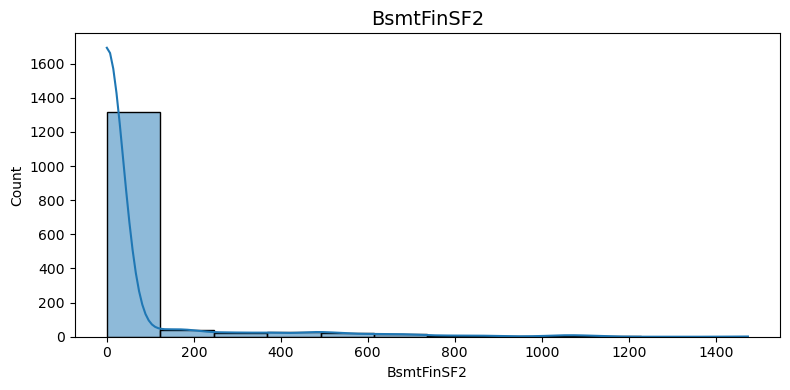

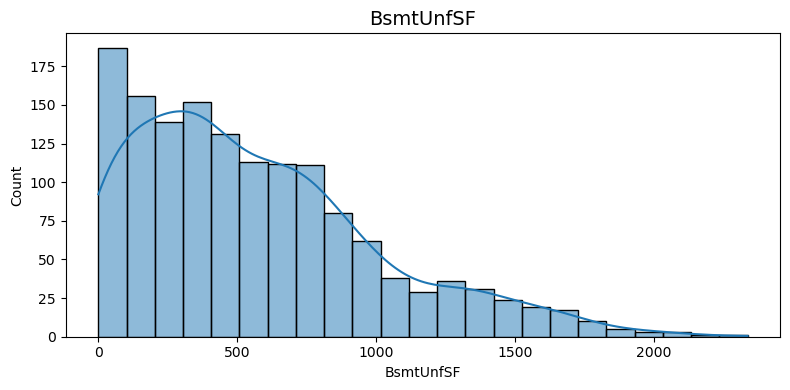

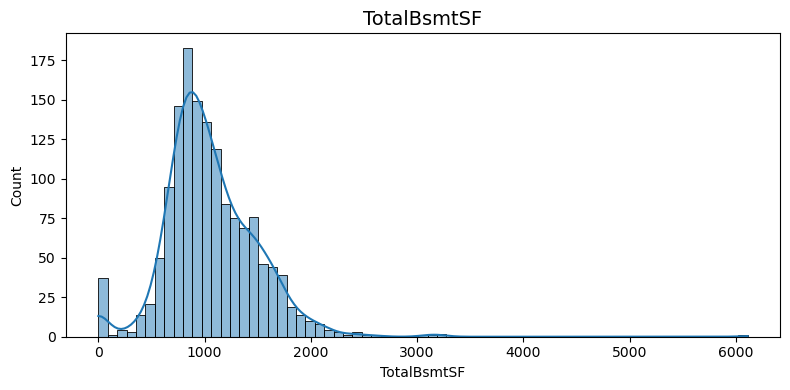

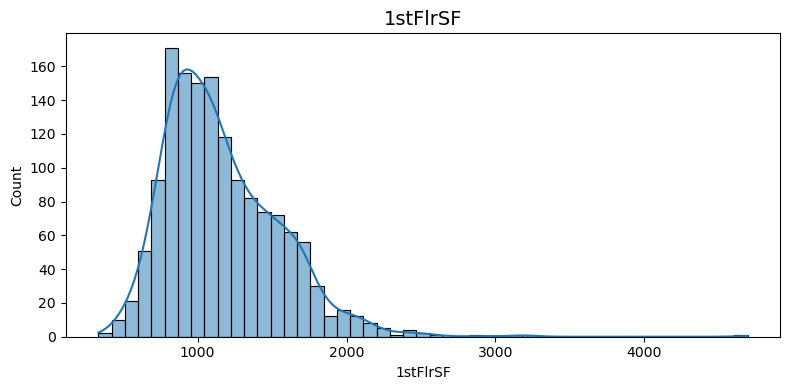

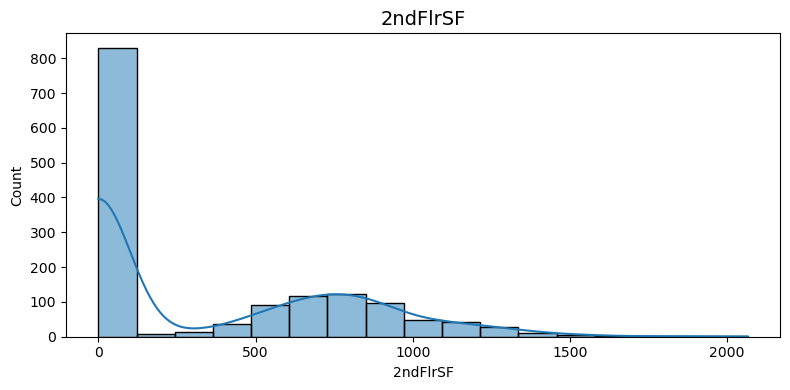

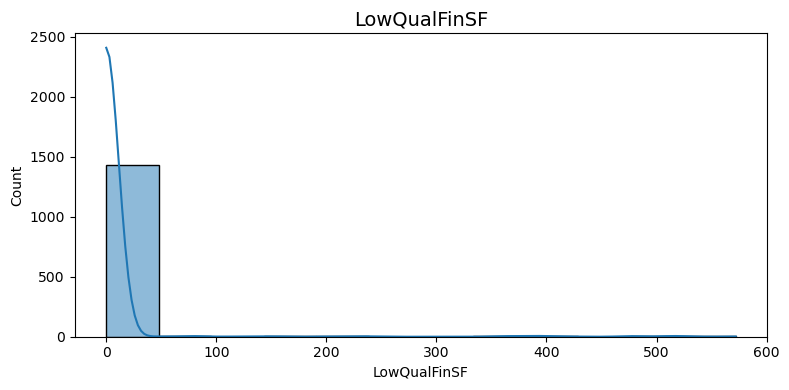

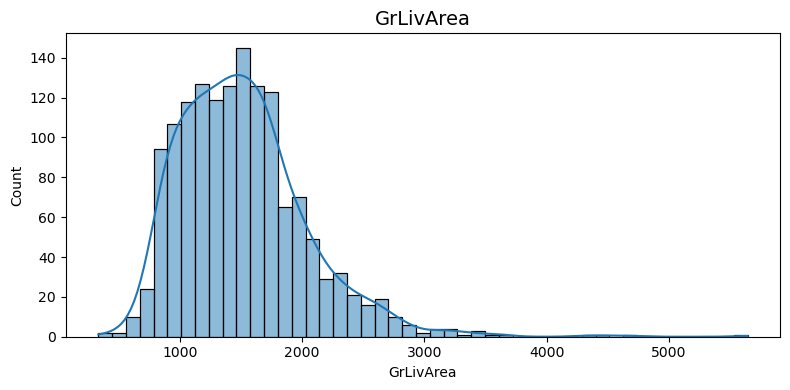

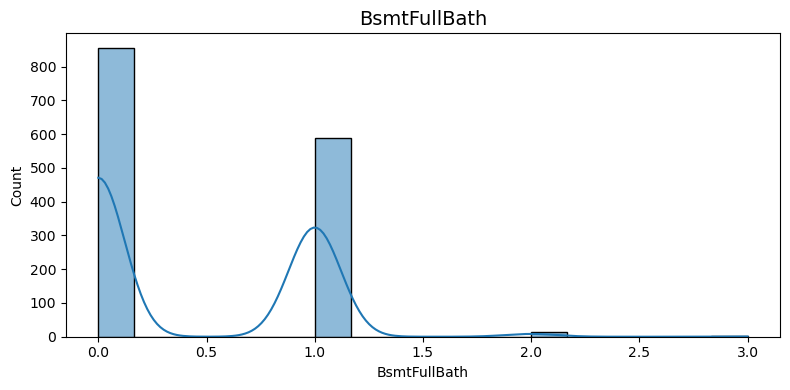

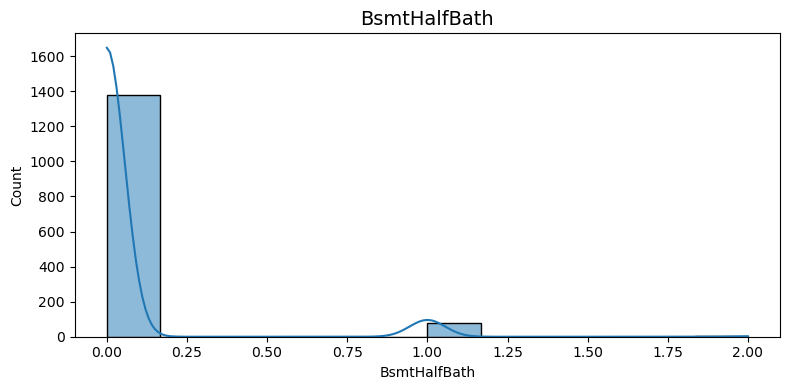

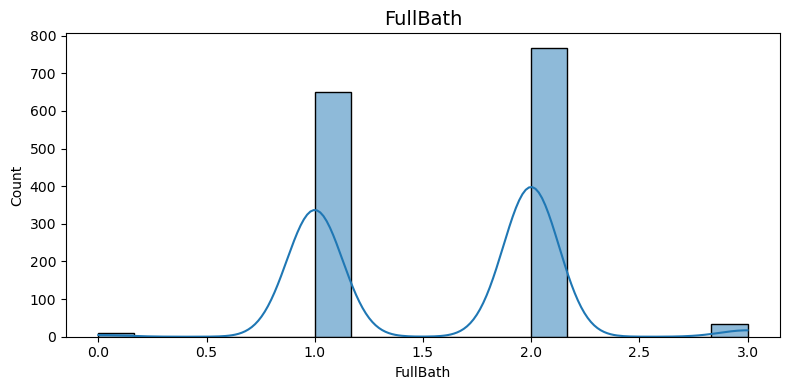

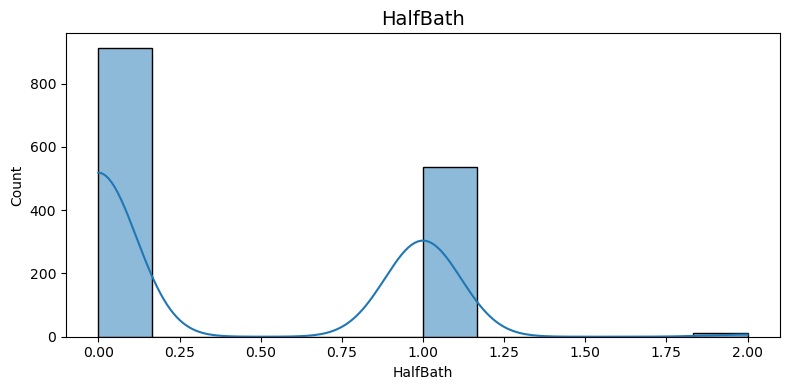

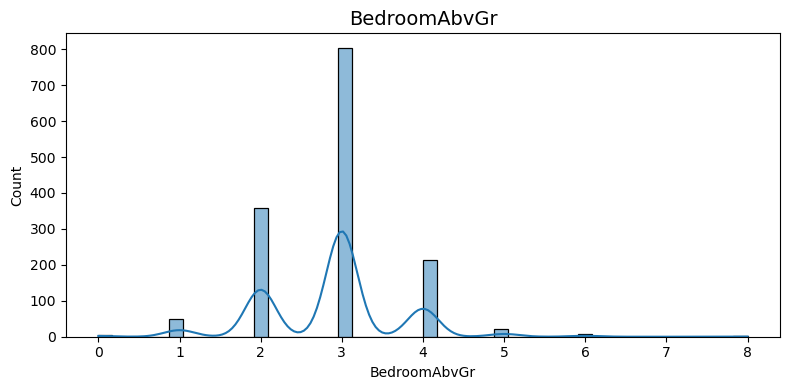

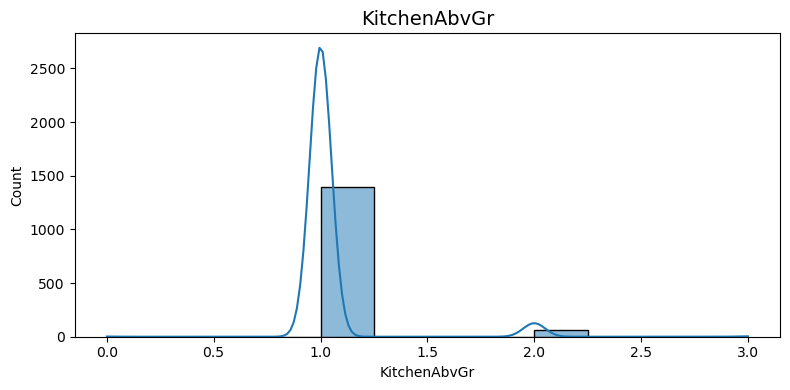

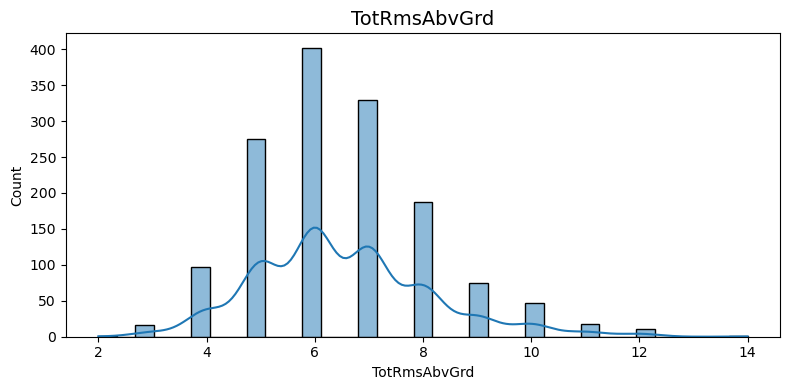

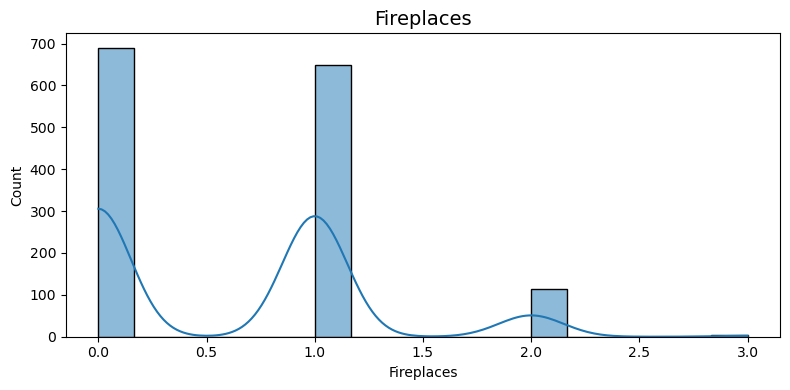

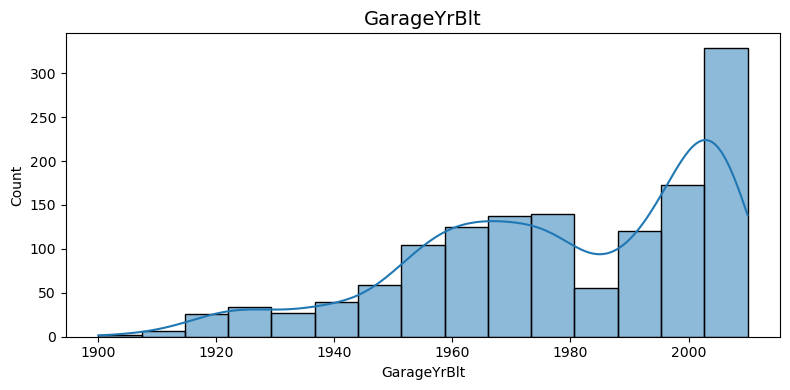

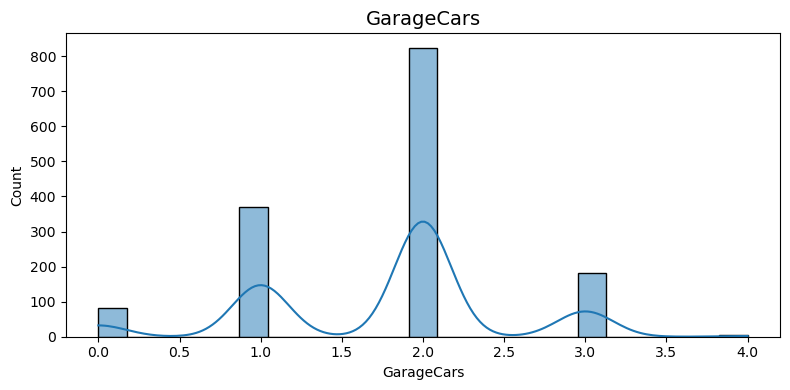

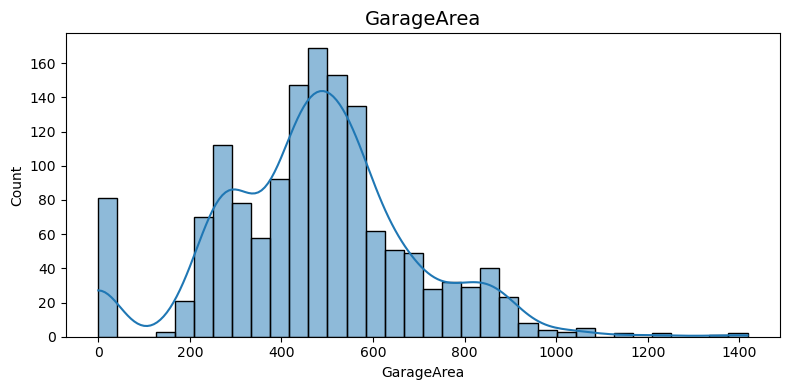

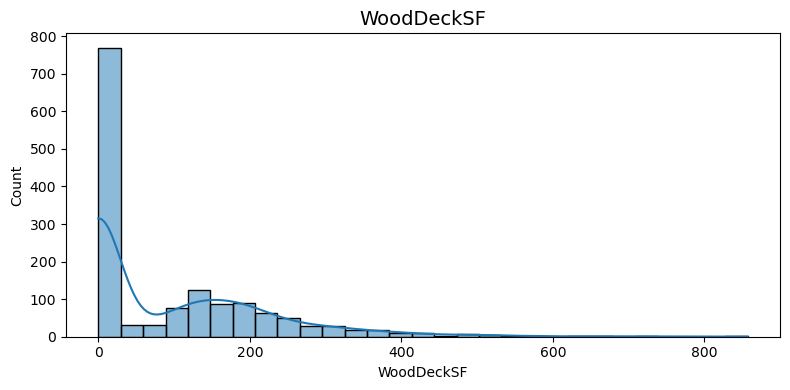

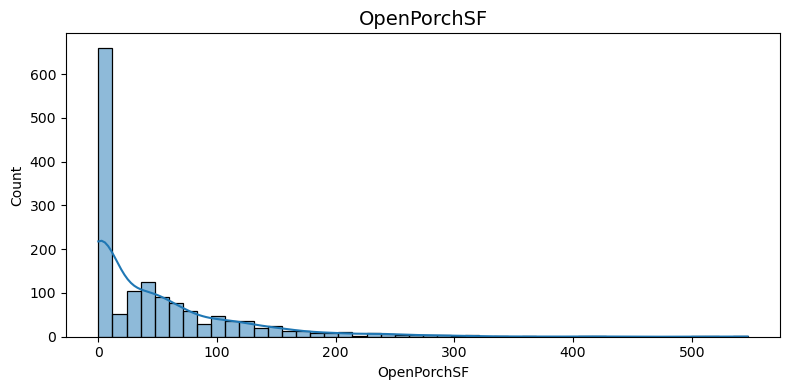

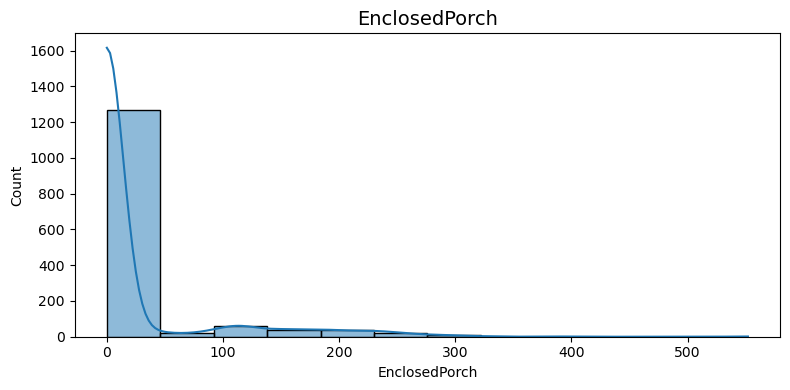

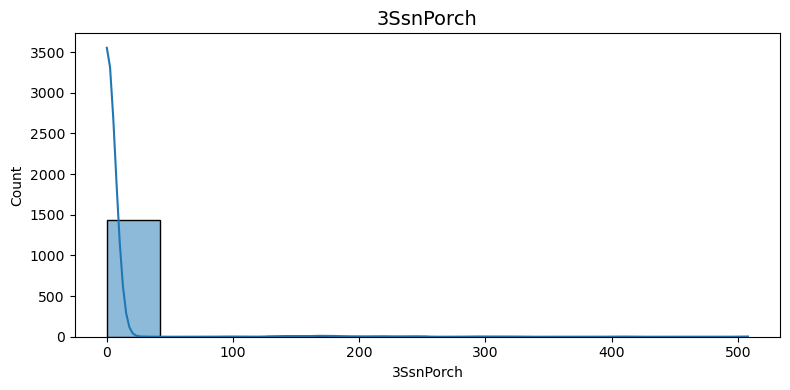

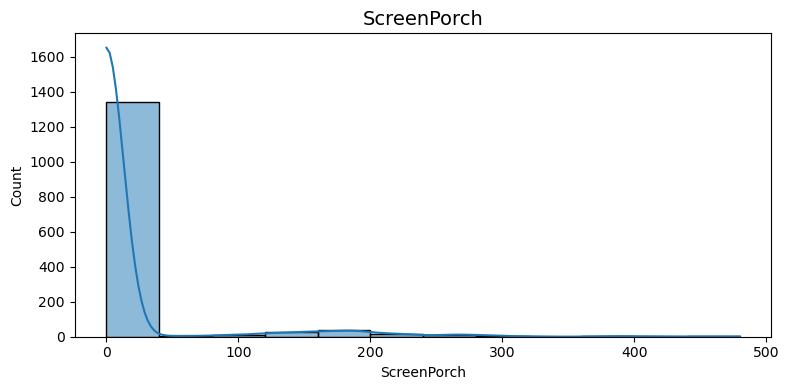

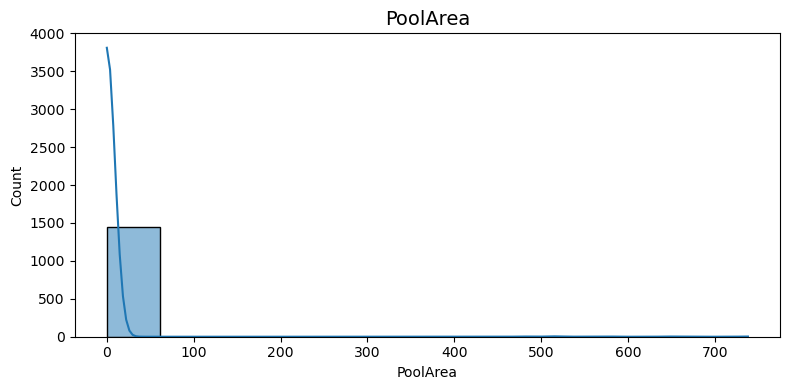

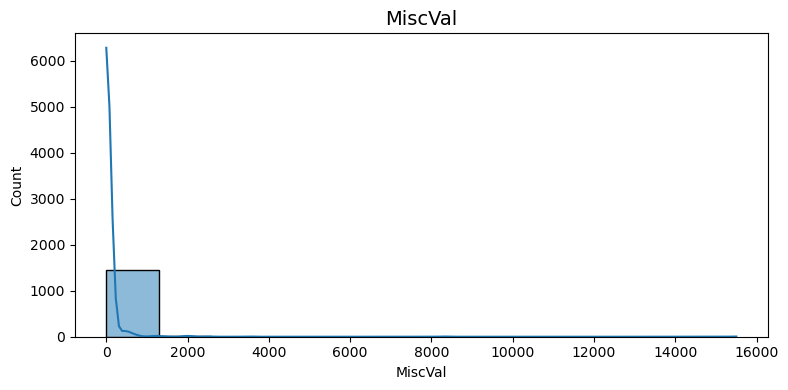

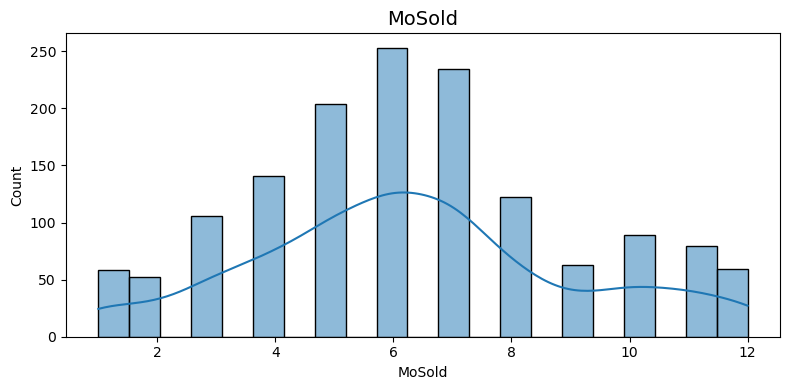

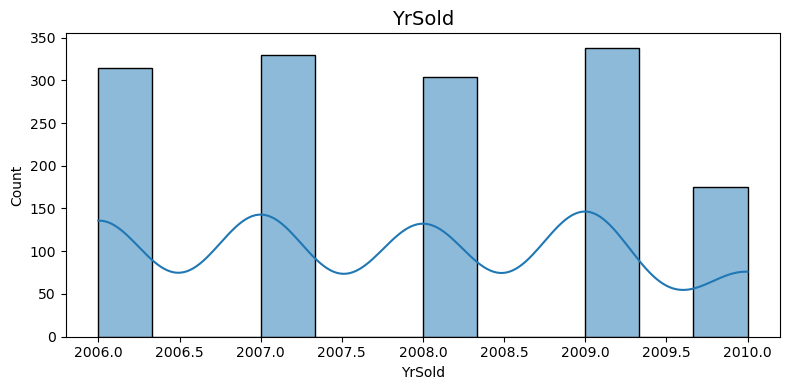

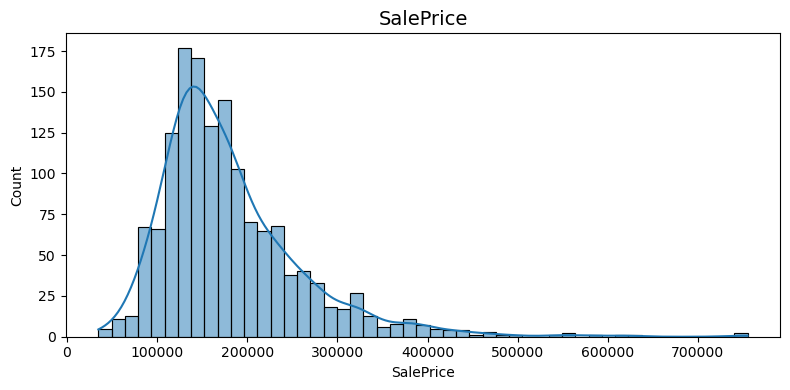

In [13]:
# numeric columns only
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(col, fontsize=14)
    plt.tight_layout()
    plt.show()


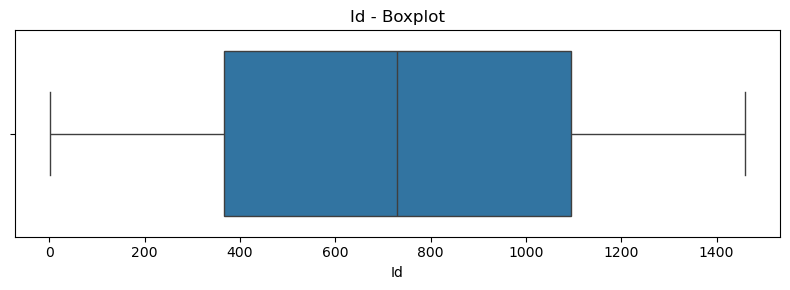

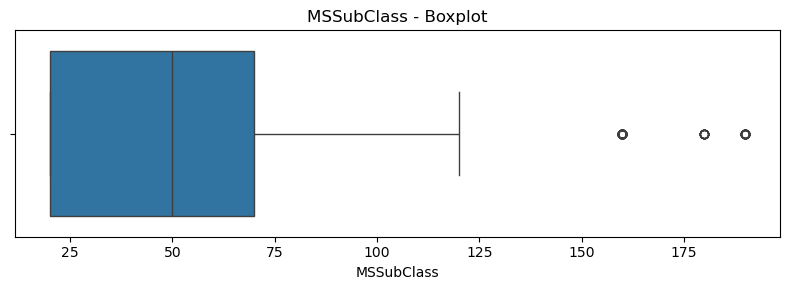

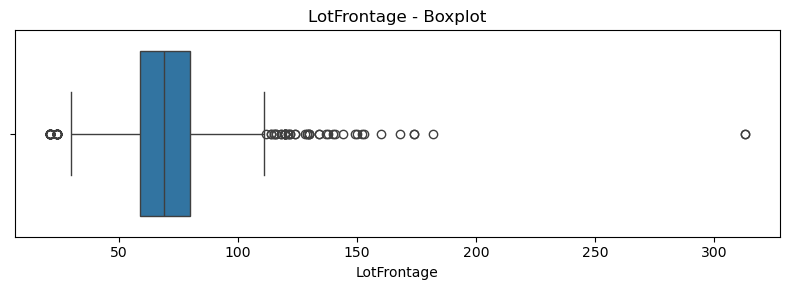

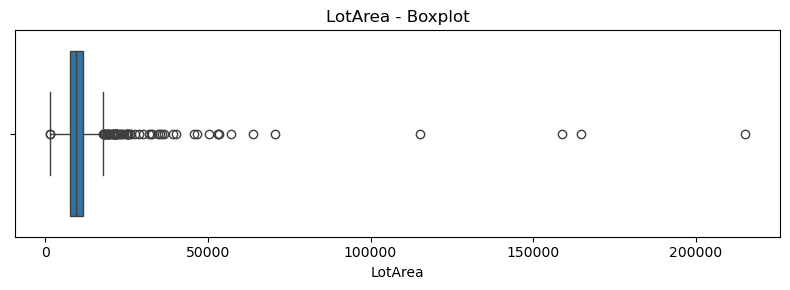

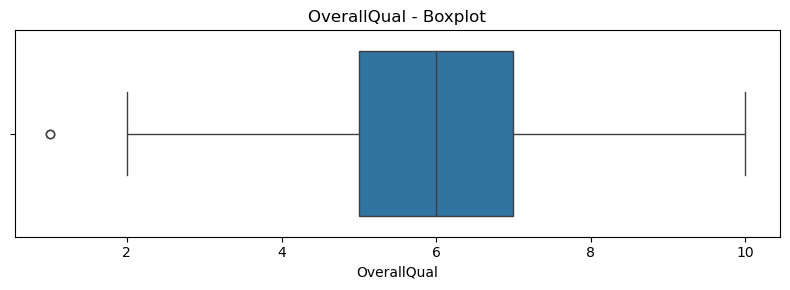

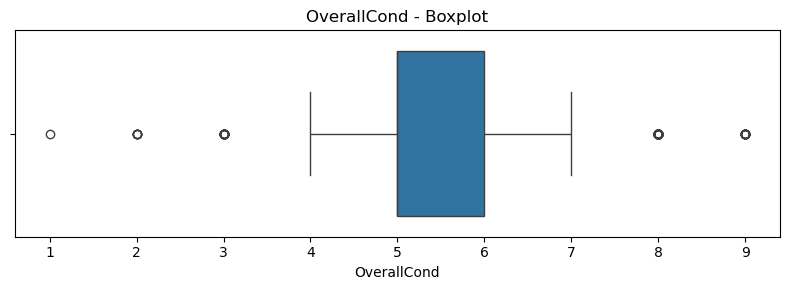

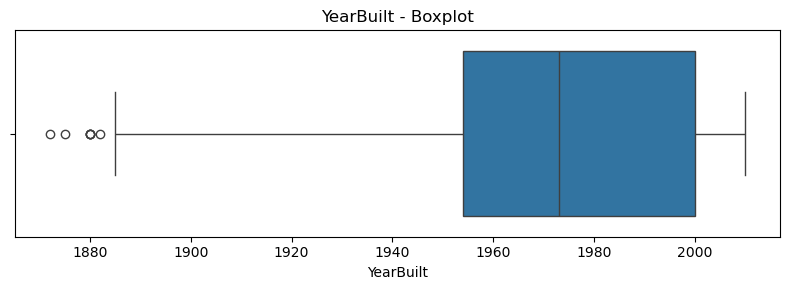

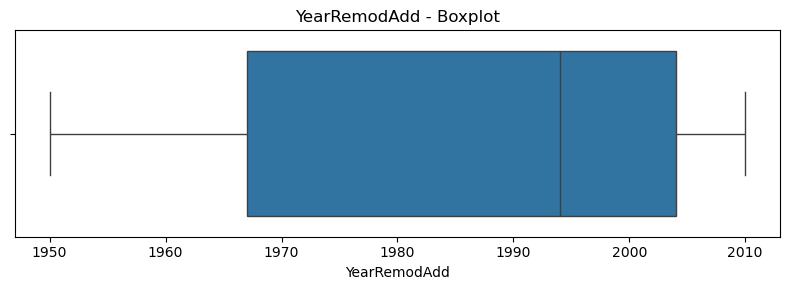

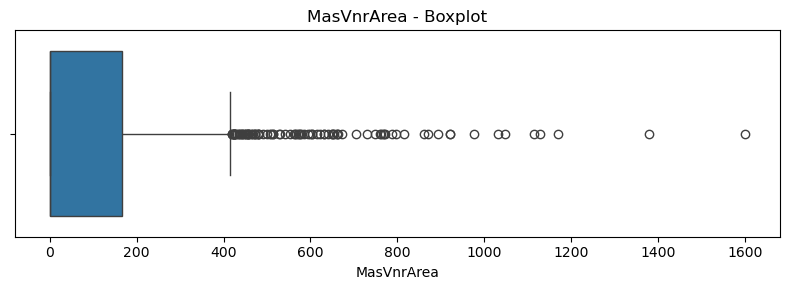

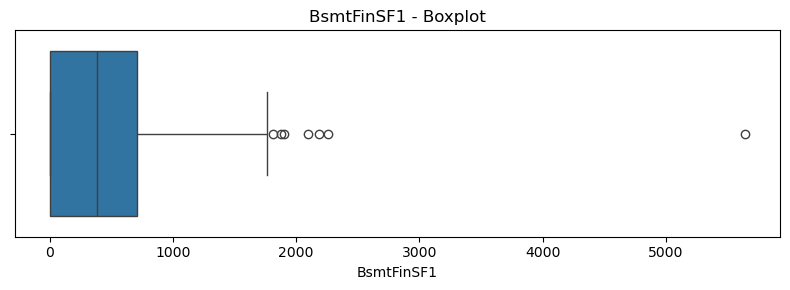

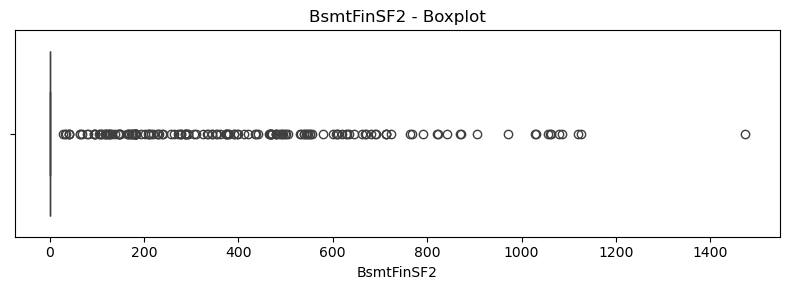

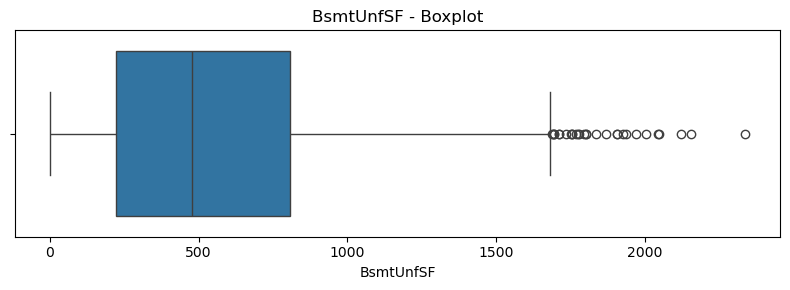

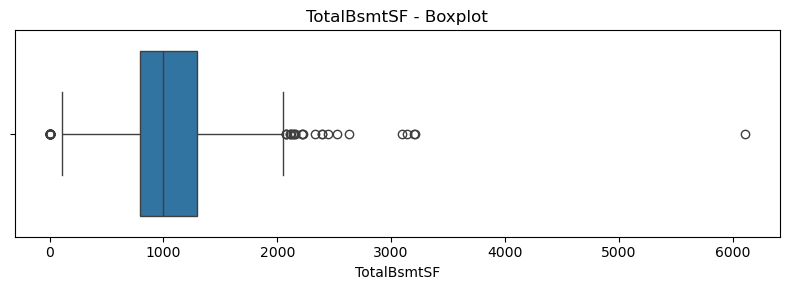

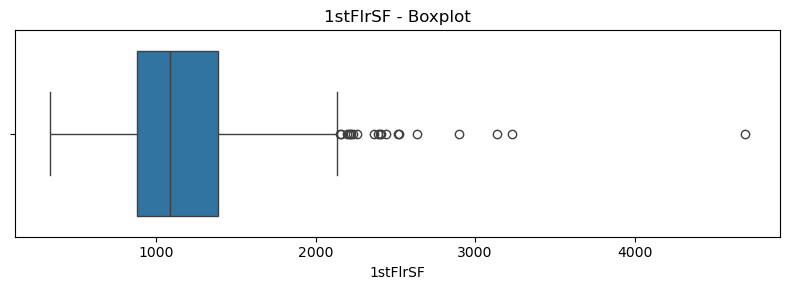

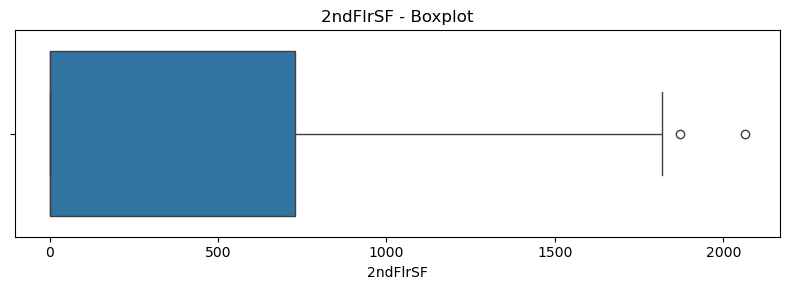

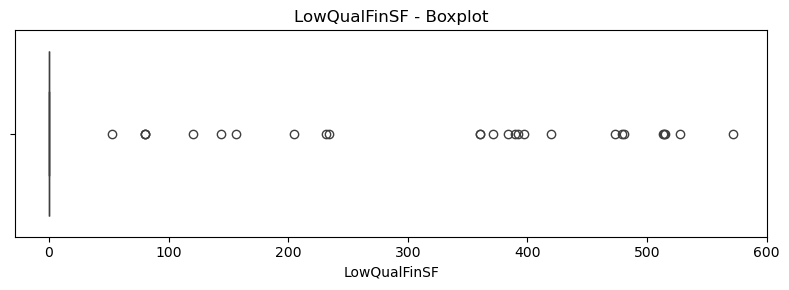

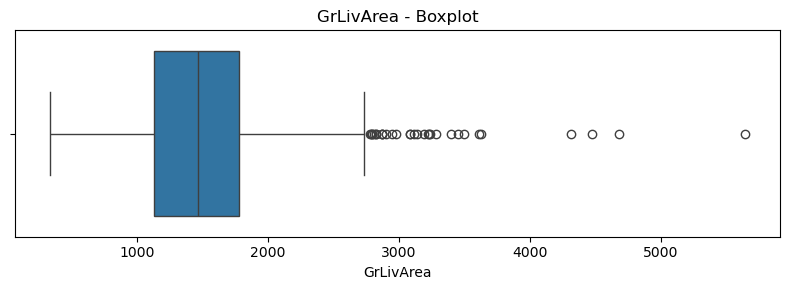

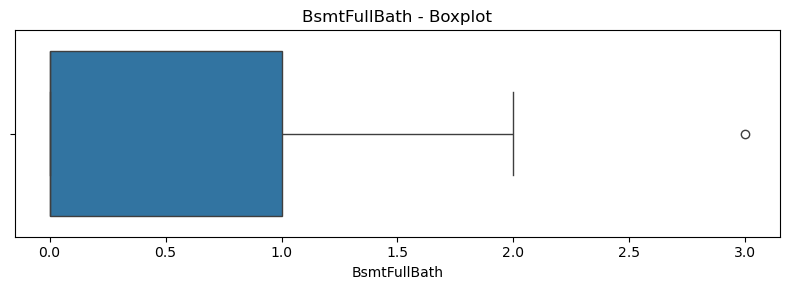

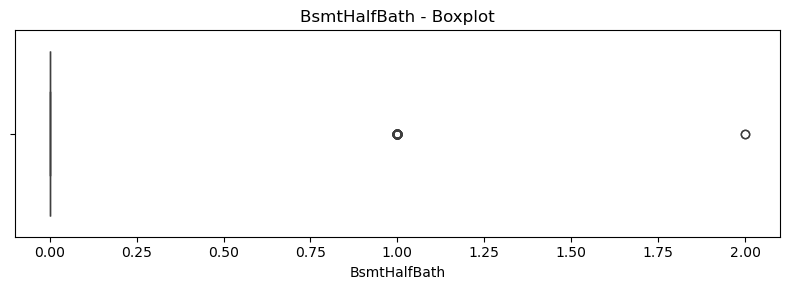

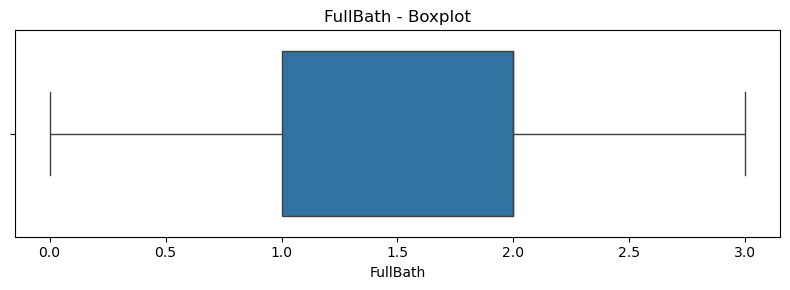

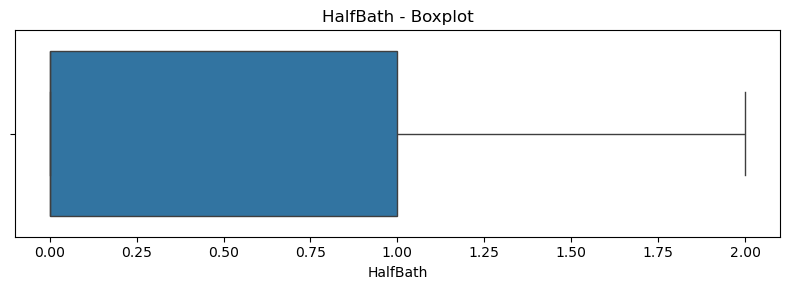

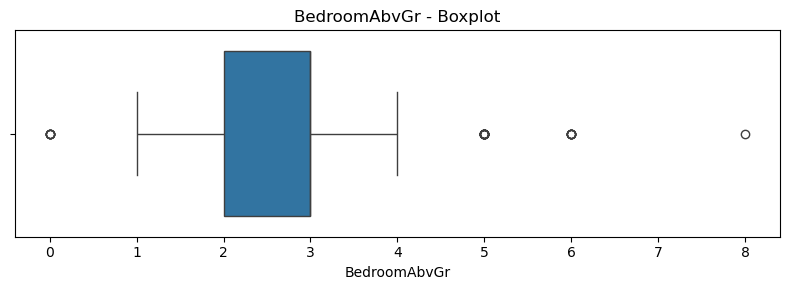

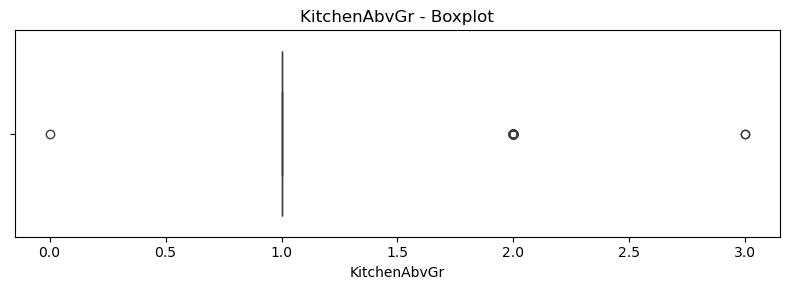

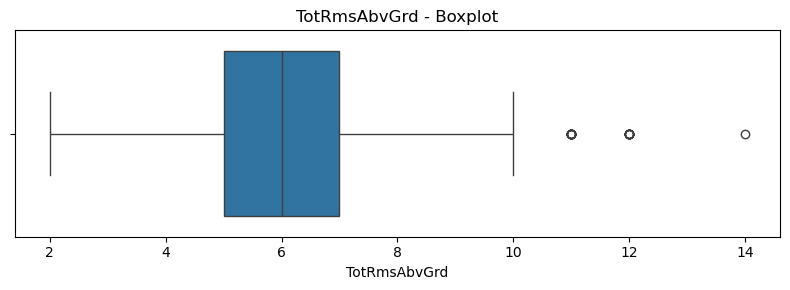

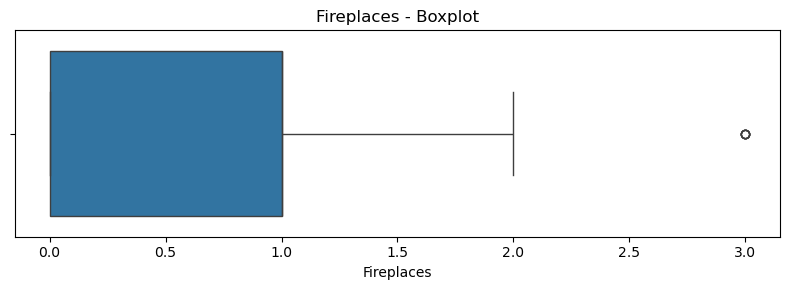

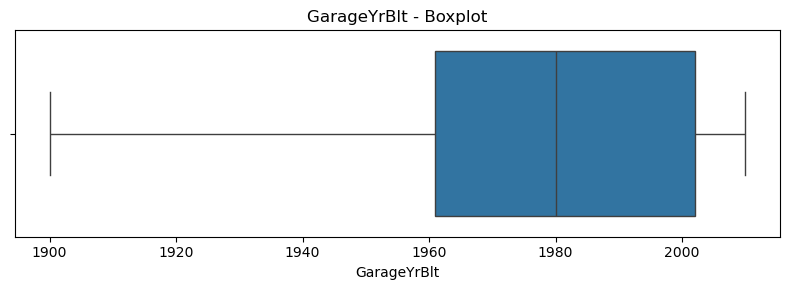

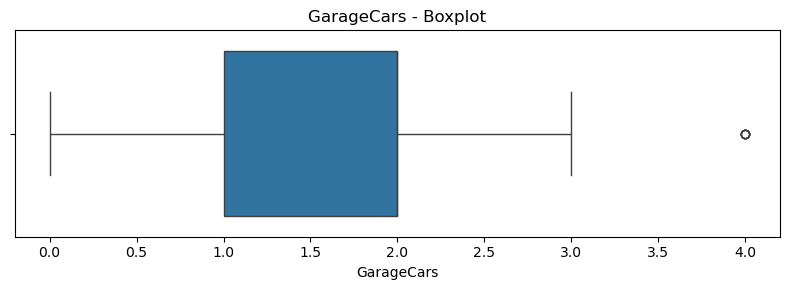

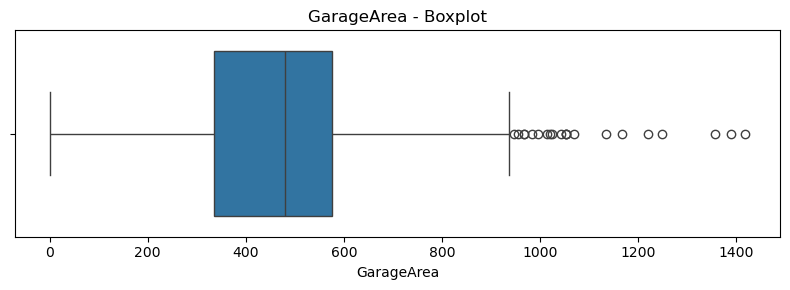

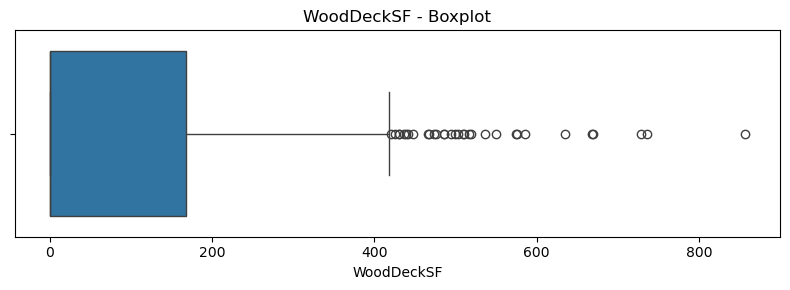

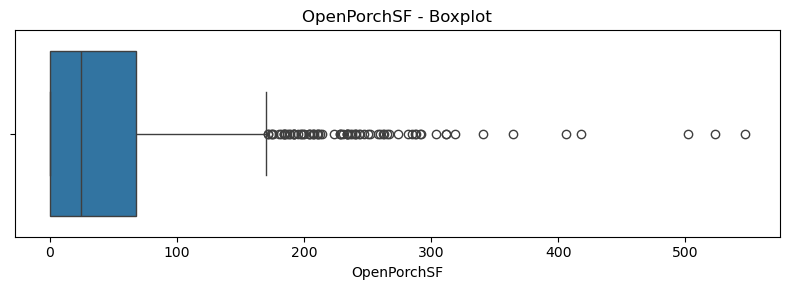

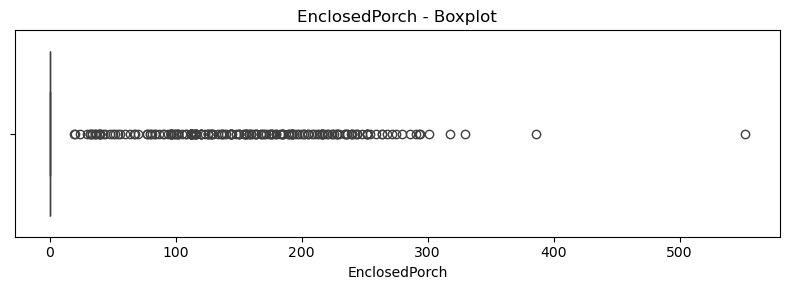

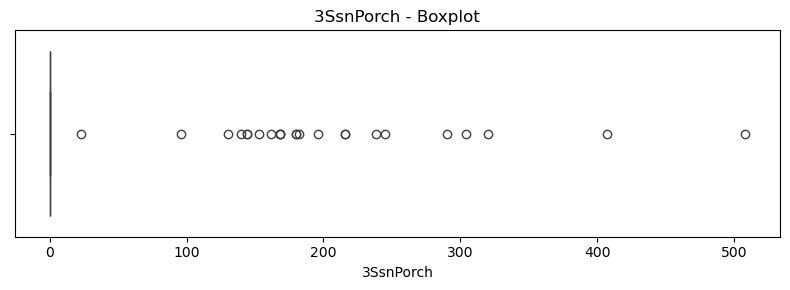

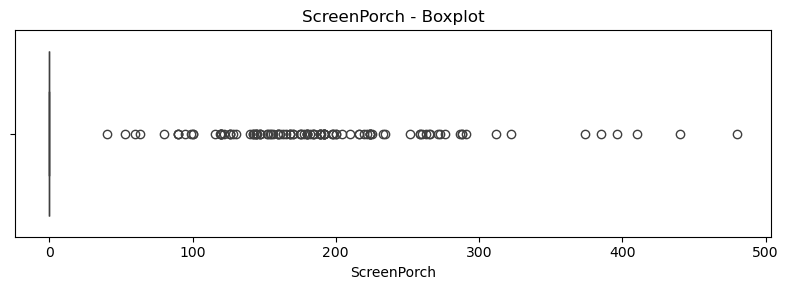

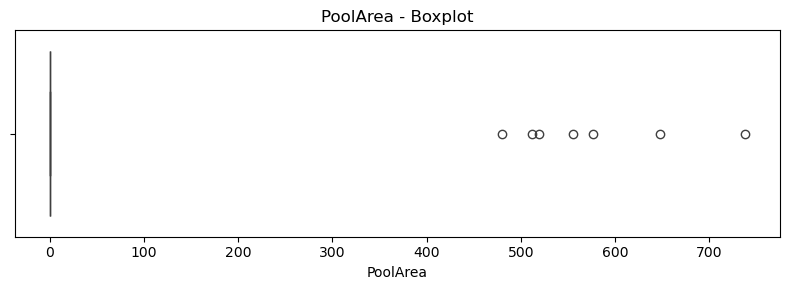

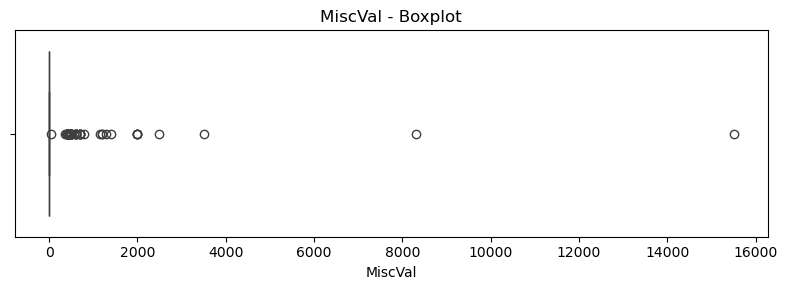

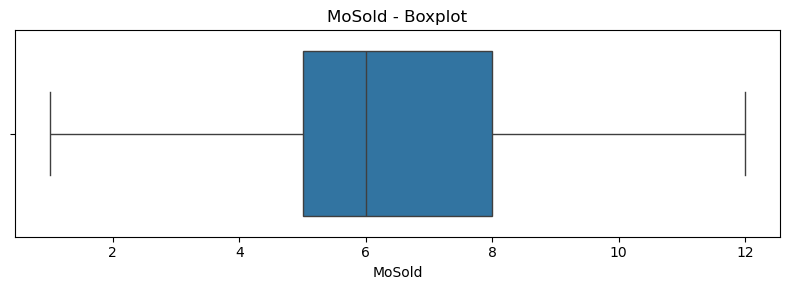

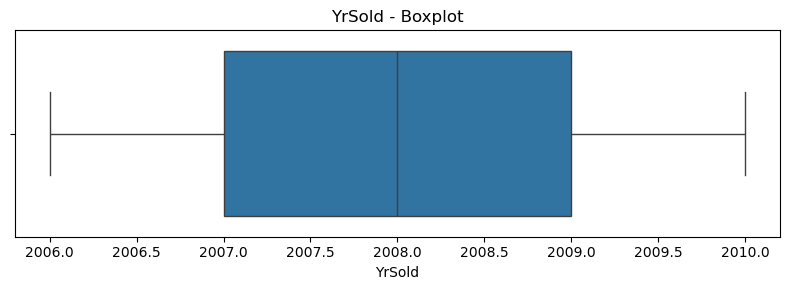

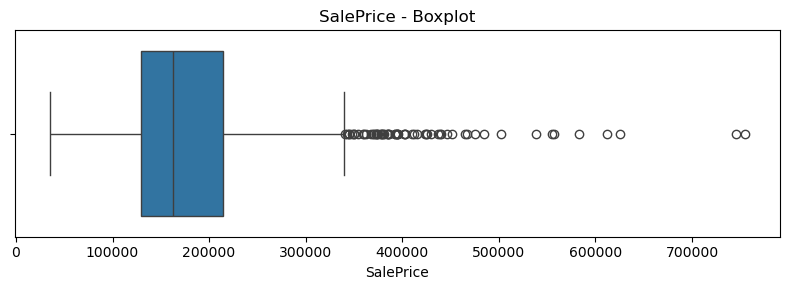

In [14]:
for col in numeric_cols:
    plt.figure(figsize=(8,3))
    sns.boxplot(x=df[col])
    plt.title(f'{col} - Boxplot')
    plt.tight_layout()
    plt.show()


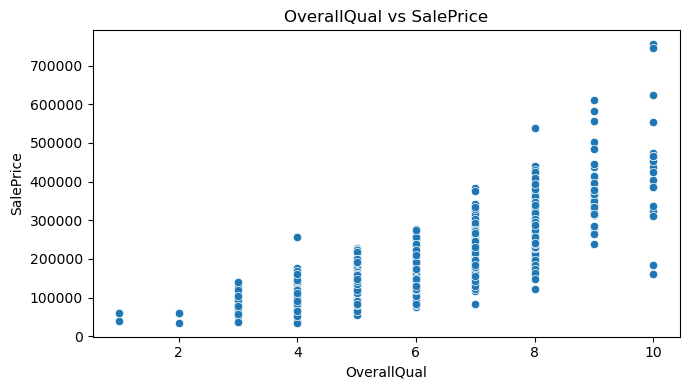

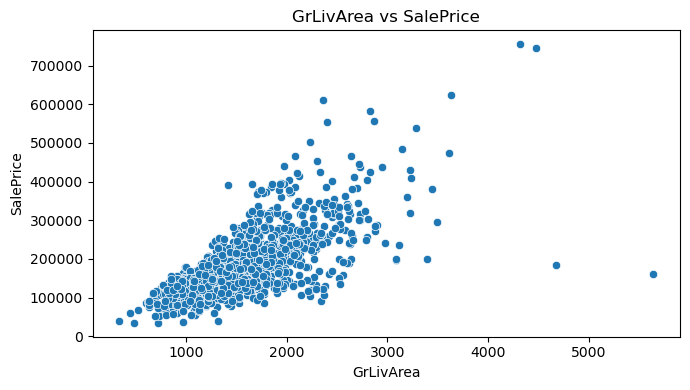

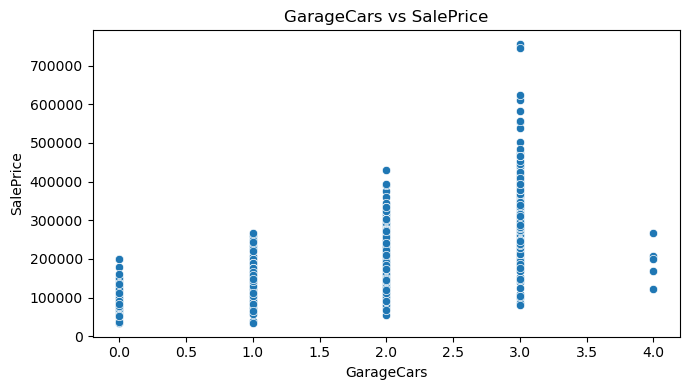

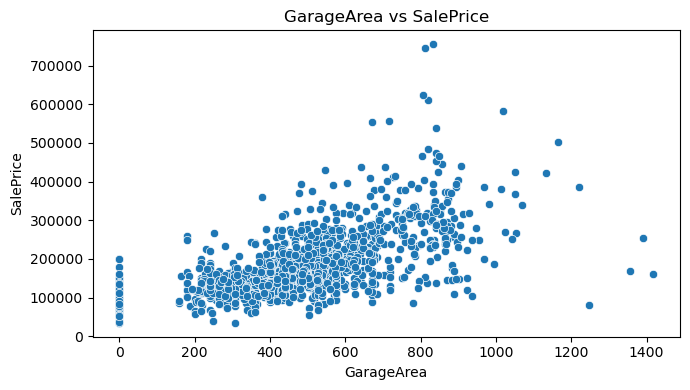

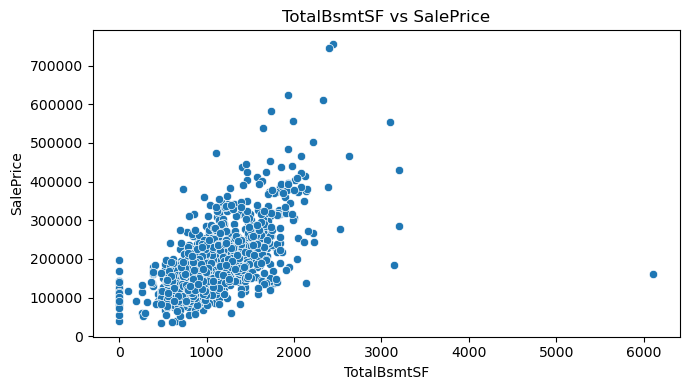

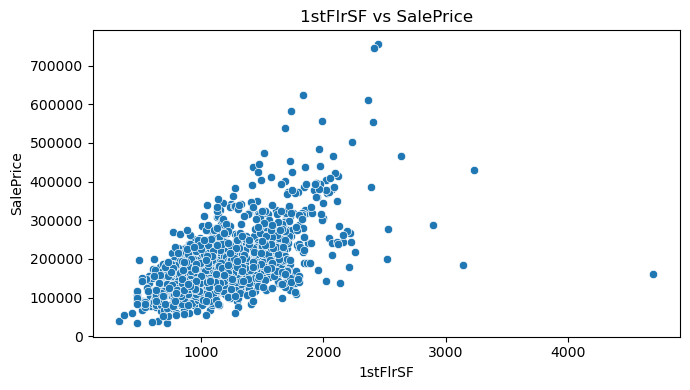

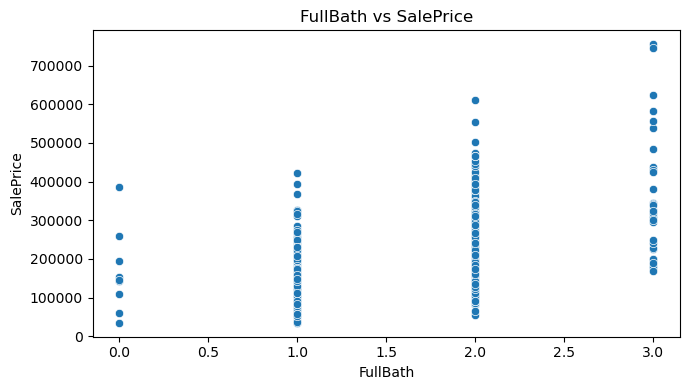

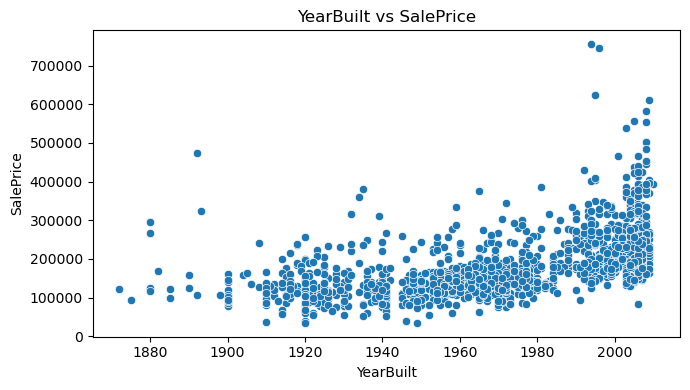

In [15]:
top_features = [
    'OverallQual','GrLivArea','GarageCars','GarageArea',
    'TotalBsmtSF','1stFlrSF','FullBath','YearBuilt'
]

for col in top_features:
    plt.figure(figsize=(7,4))
    sns.scatterplot(x=df[col], y=df['SalePrice'])
    plt.title(f'{col} vs SalePrice')
    plt.tight_layout()
    plt.show()


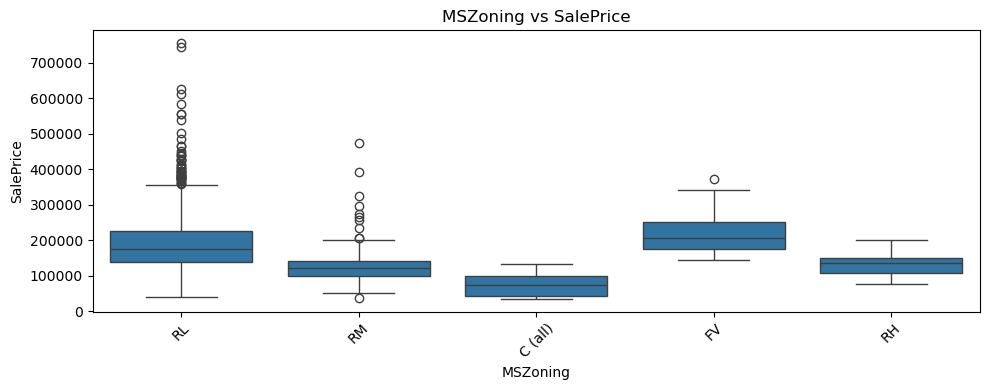

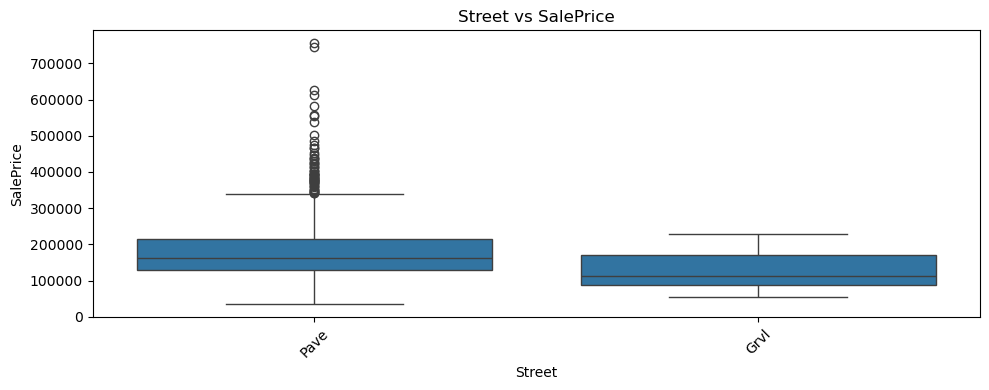

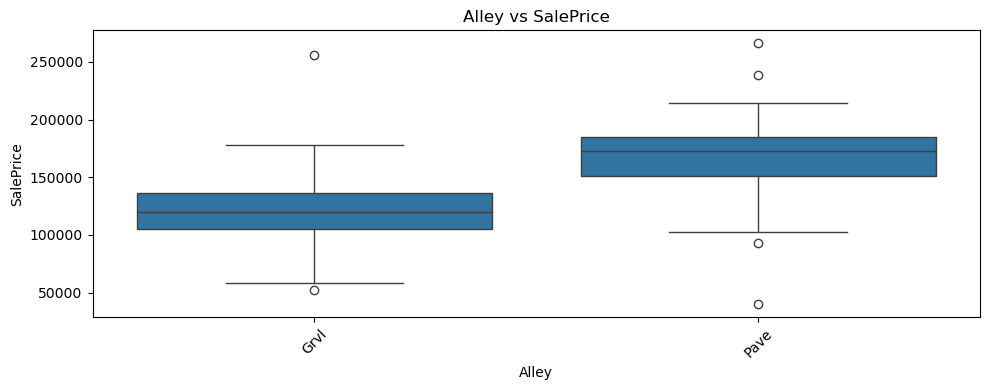

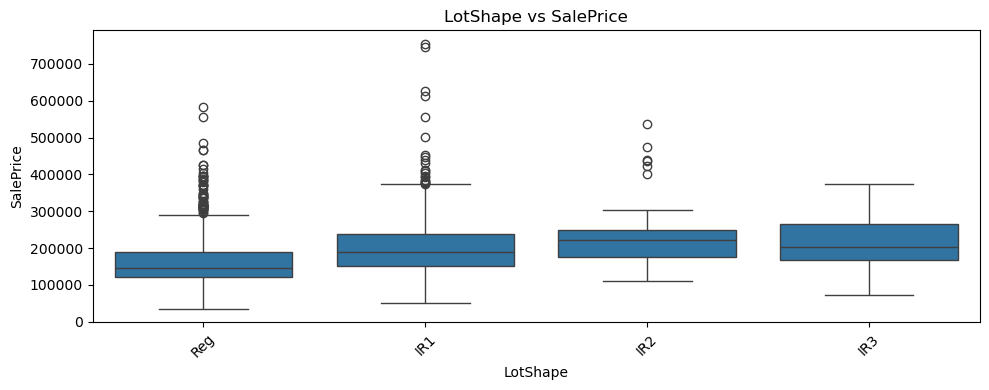

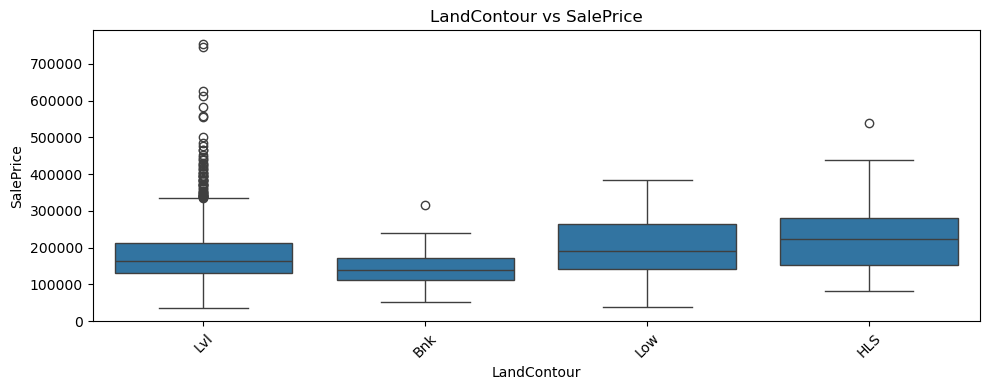

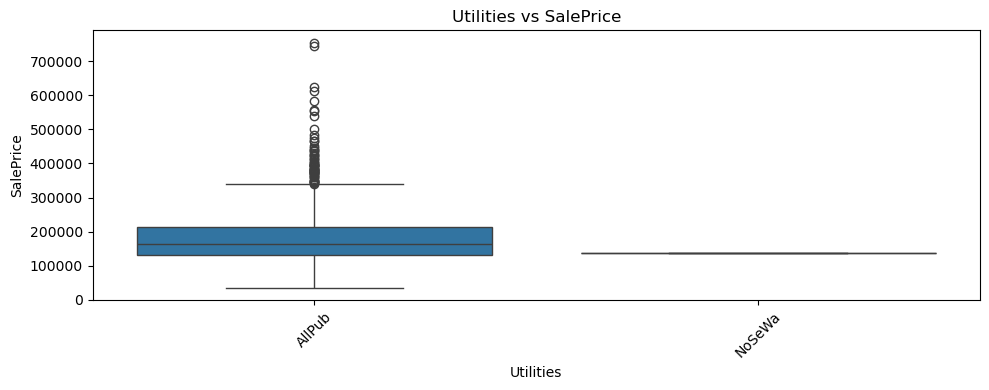

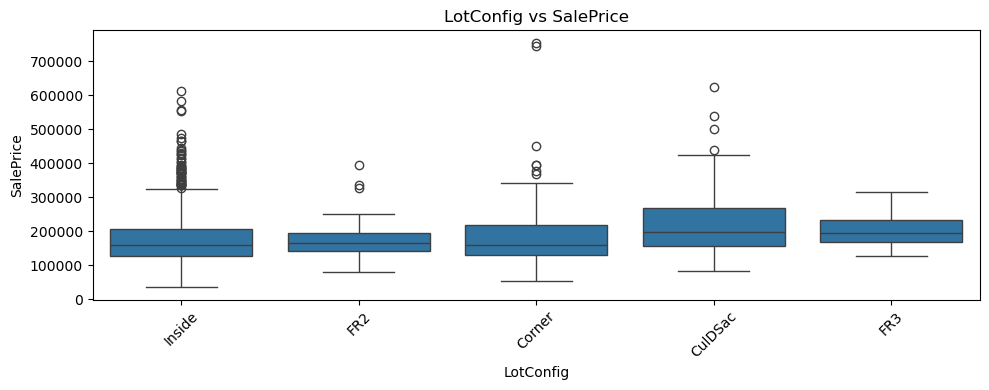

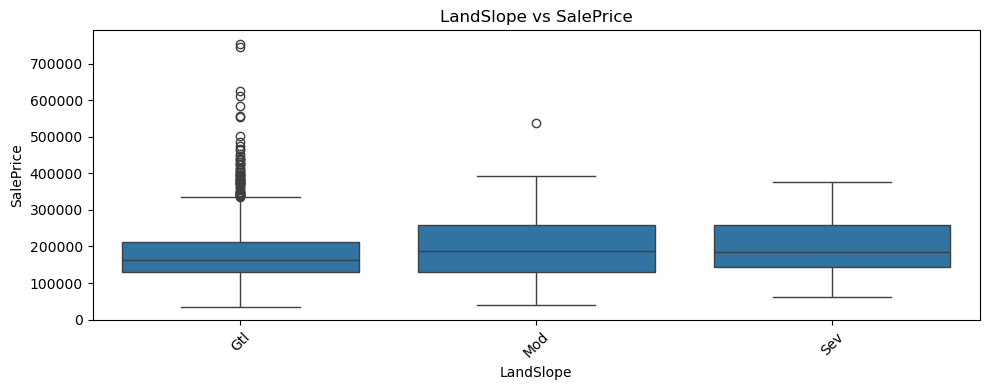

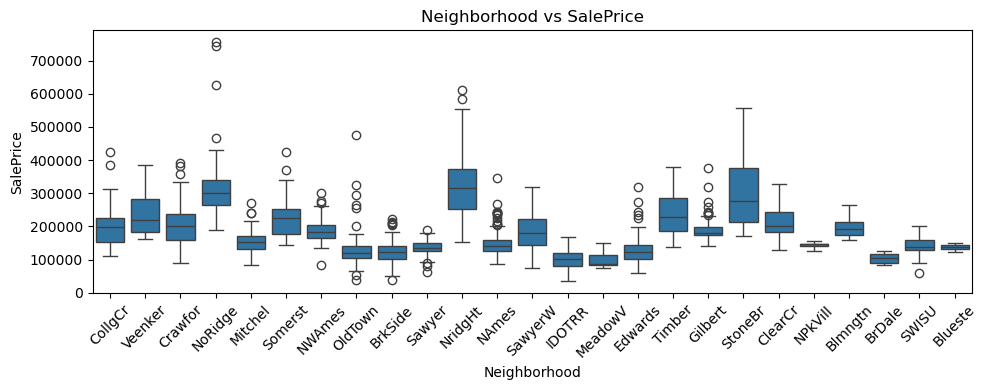

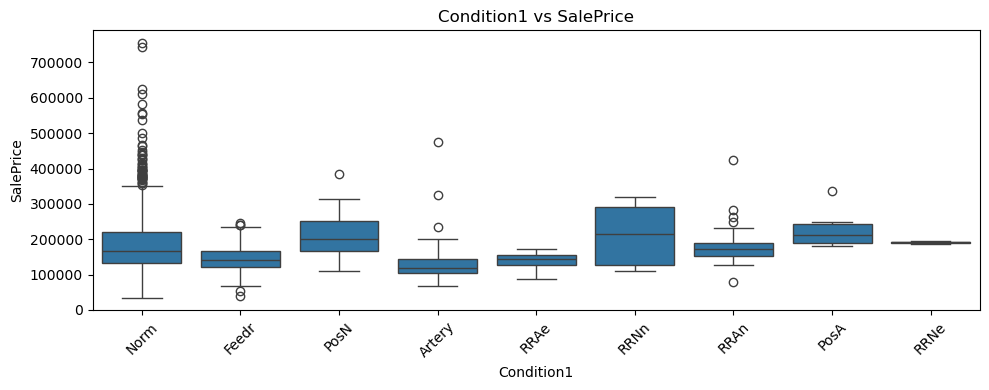

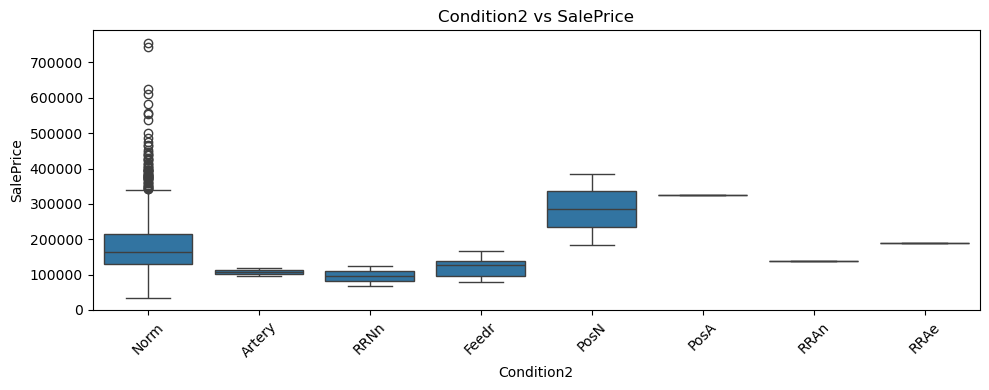

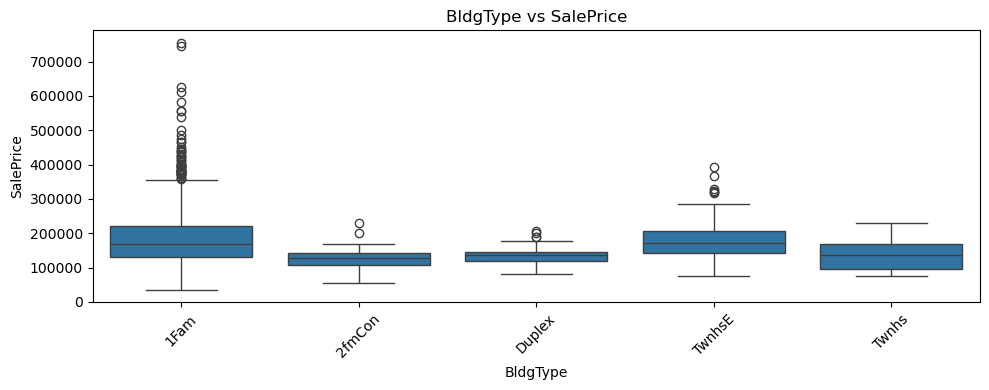

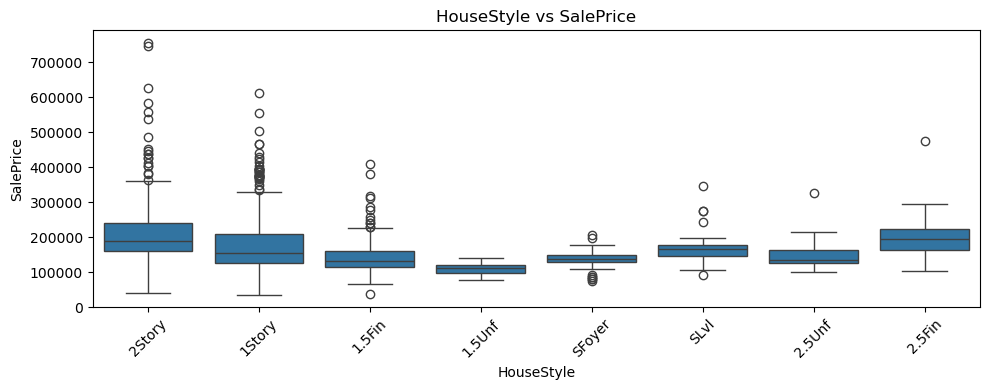

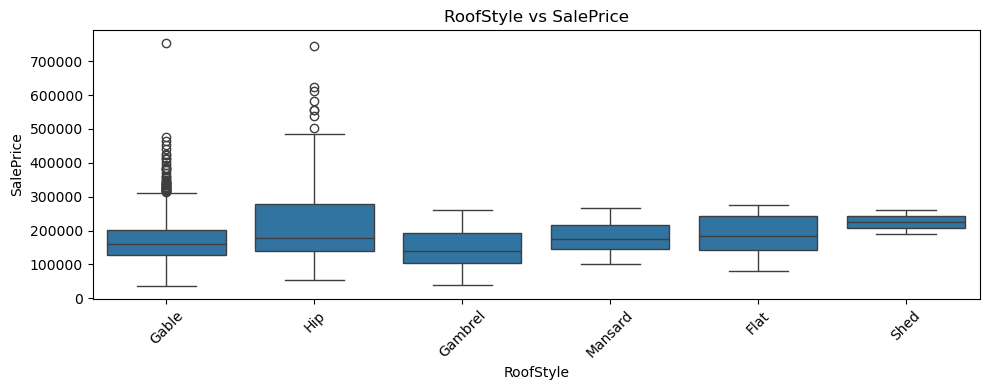

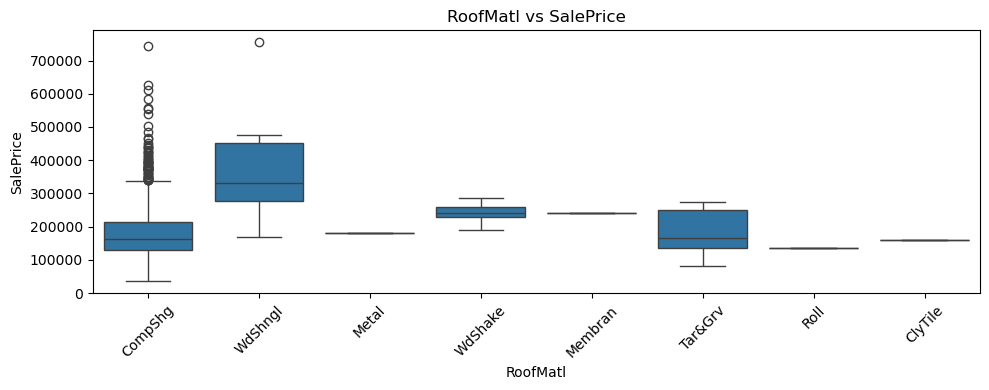

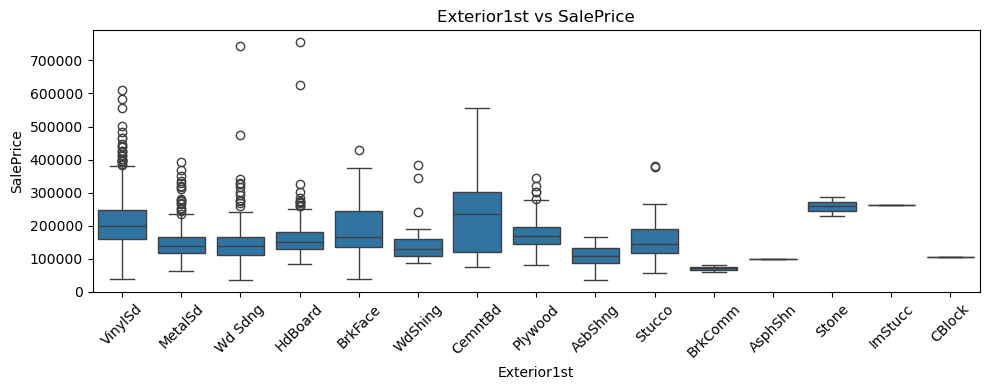

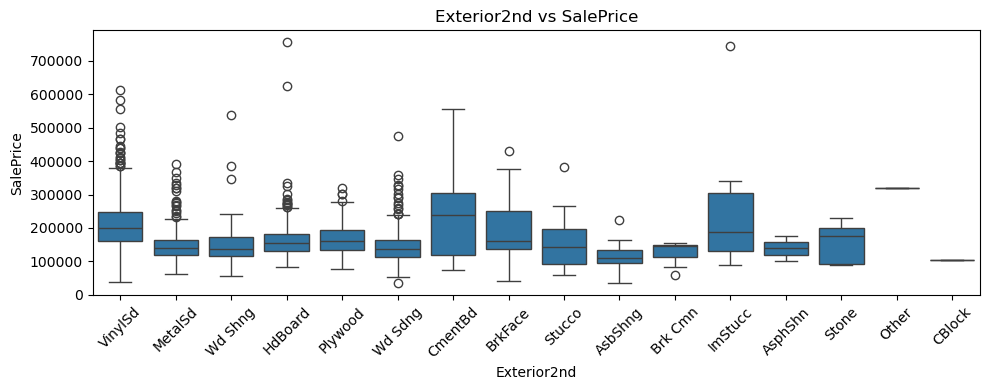

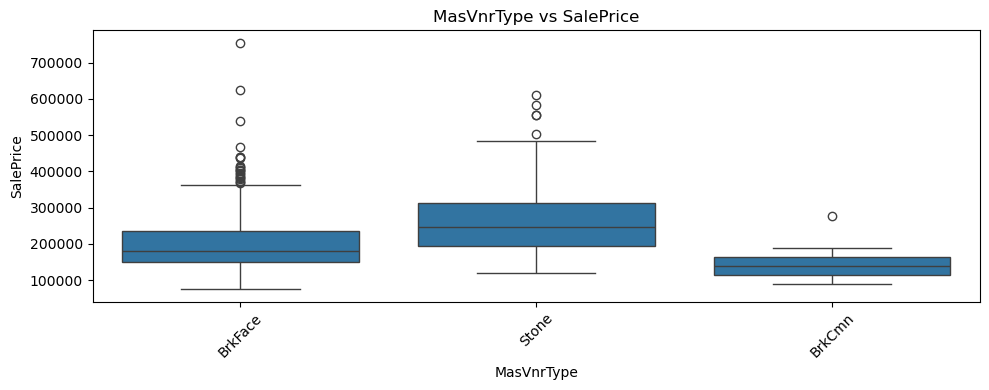

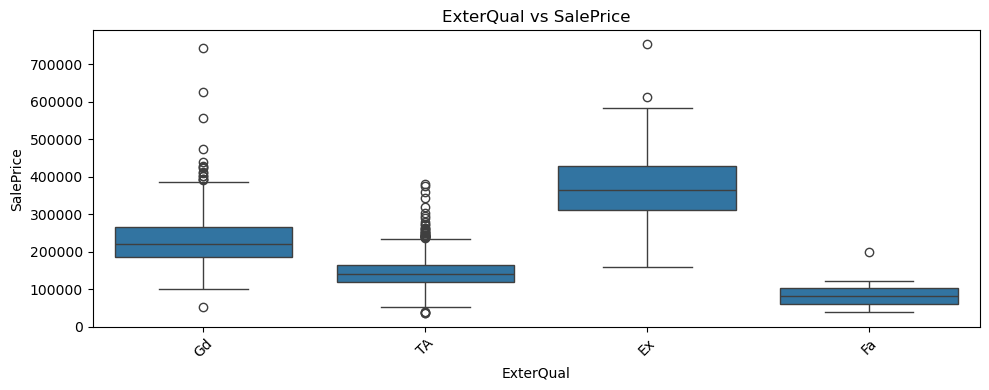

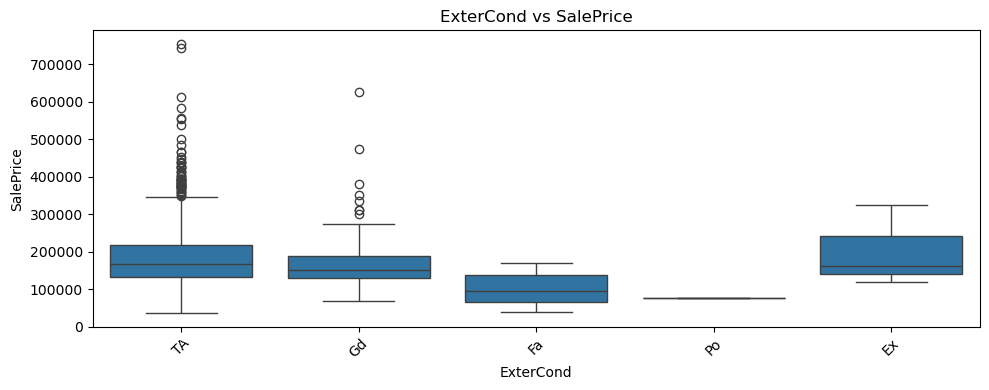

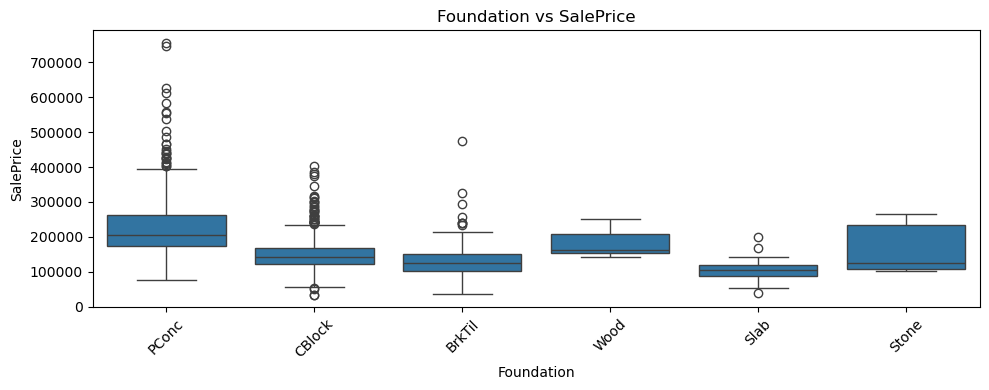

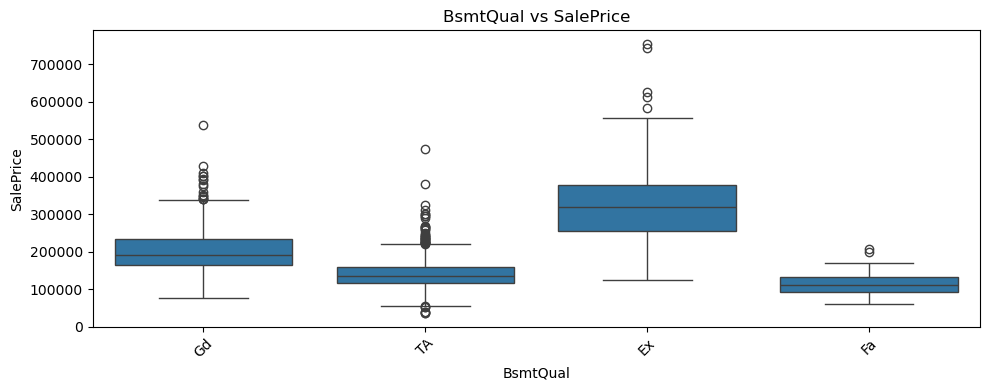

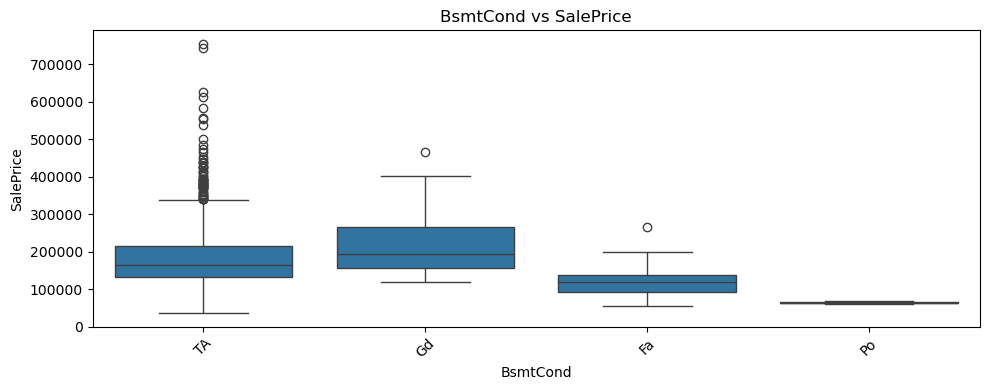

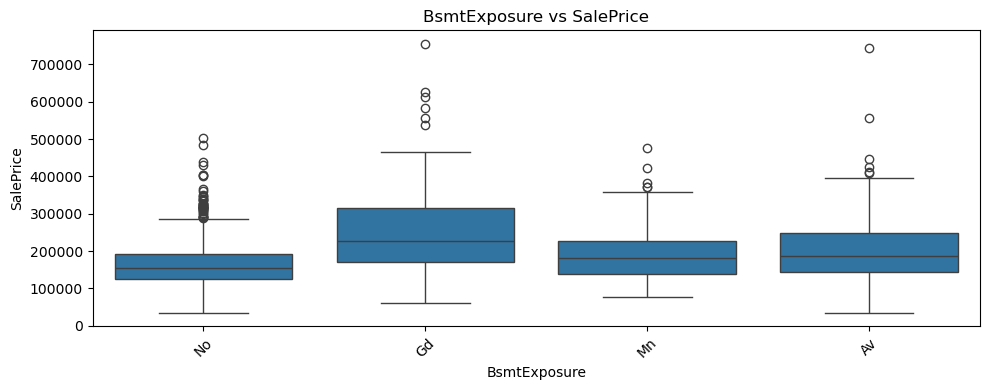

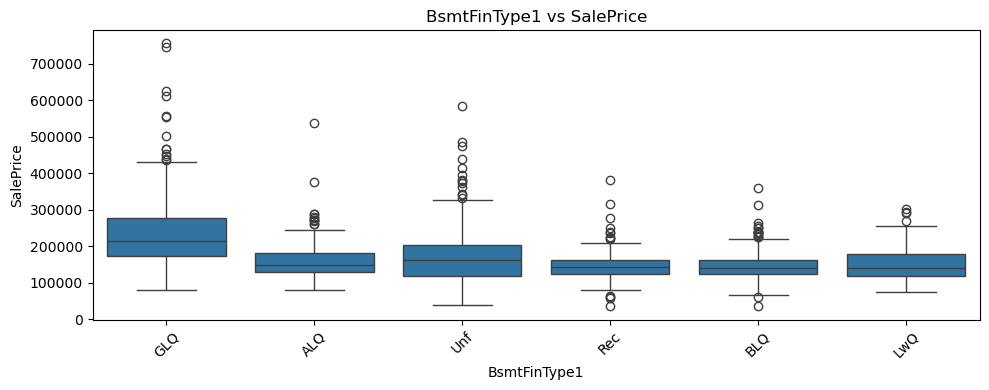

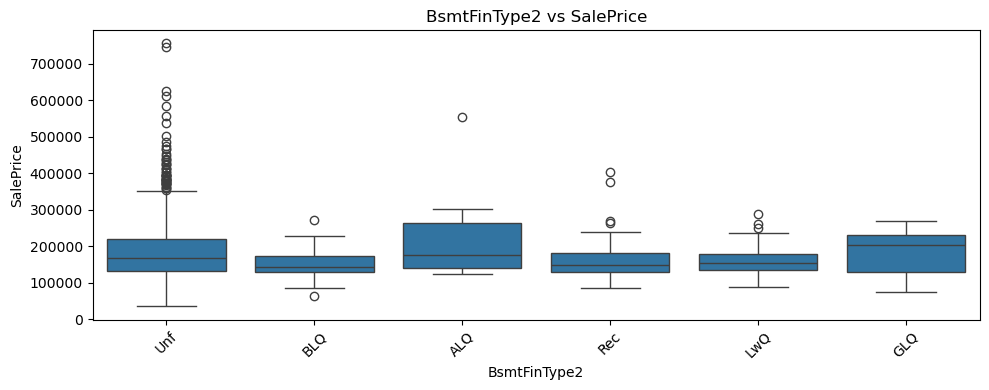

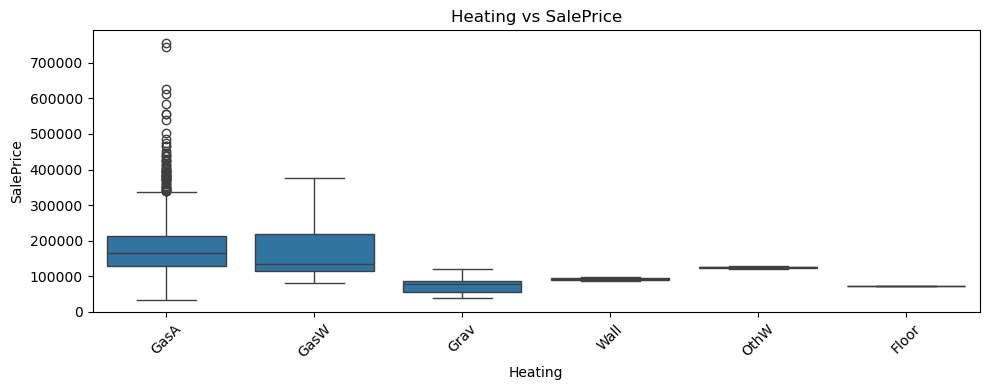

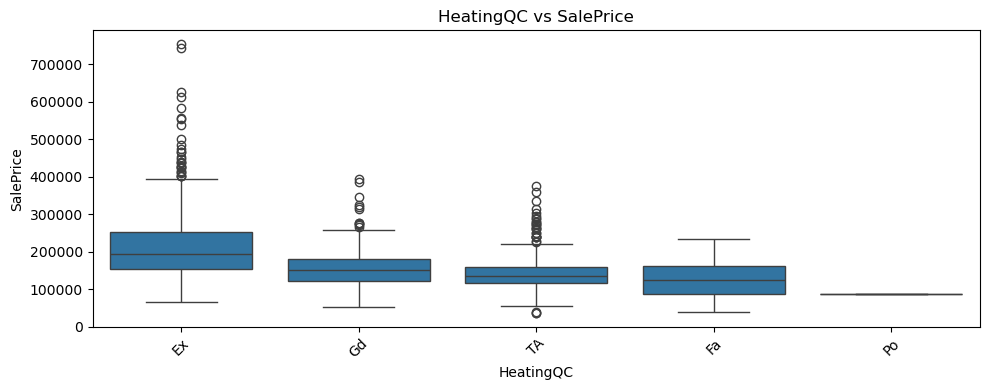

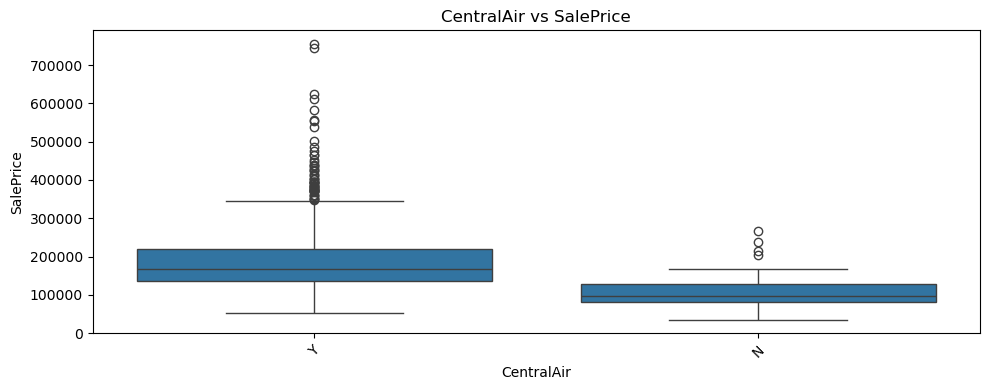

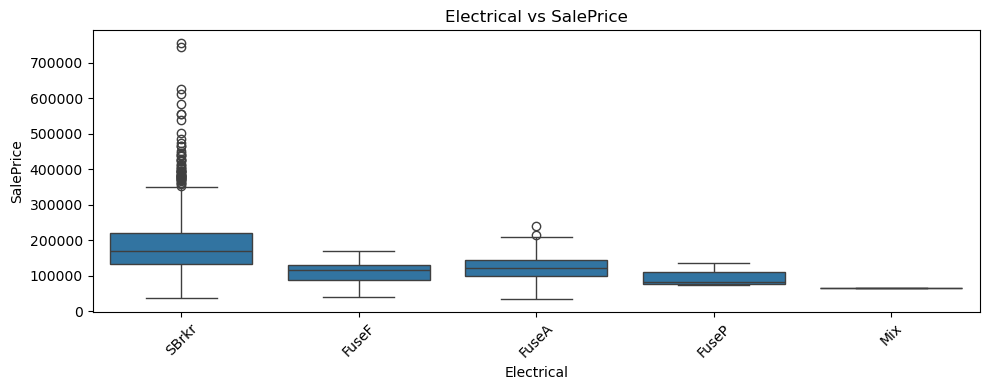

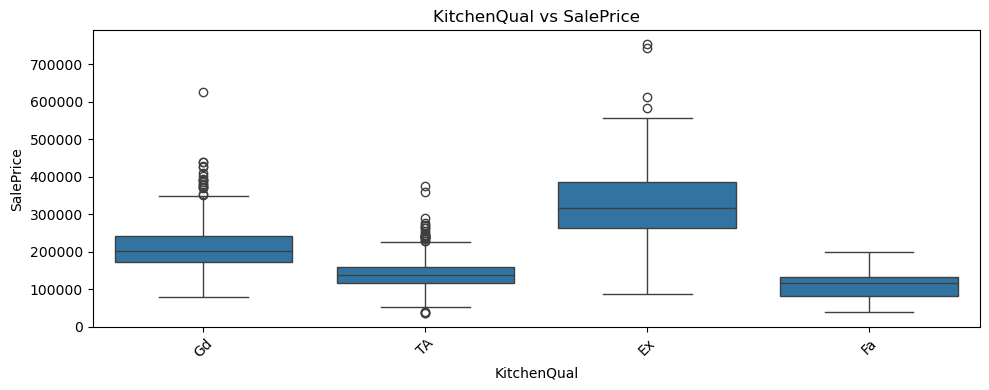

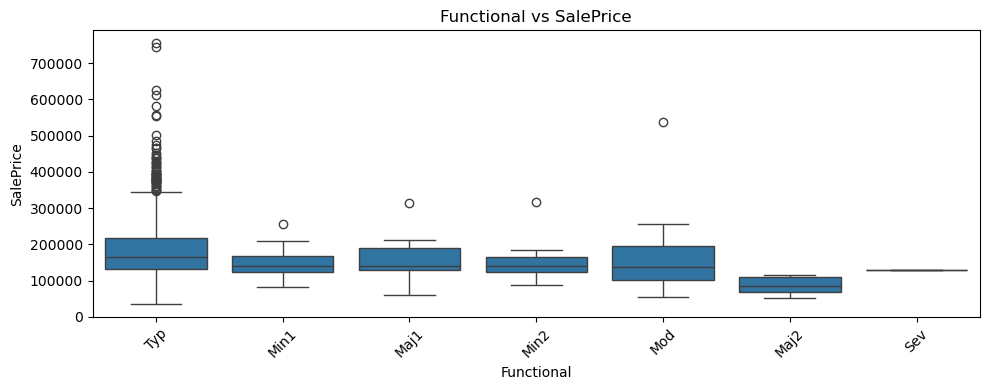

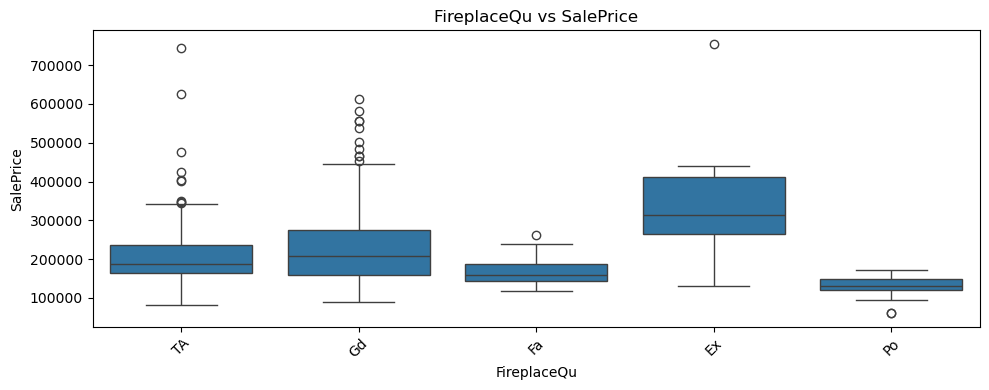

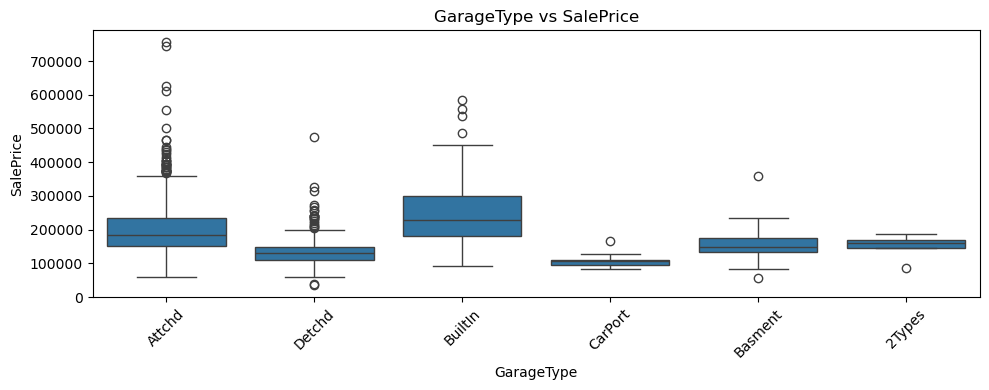

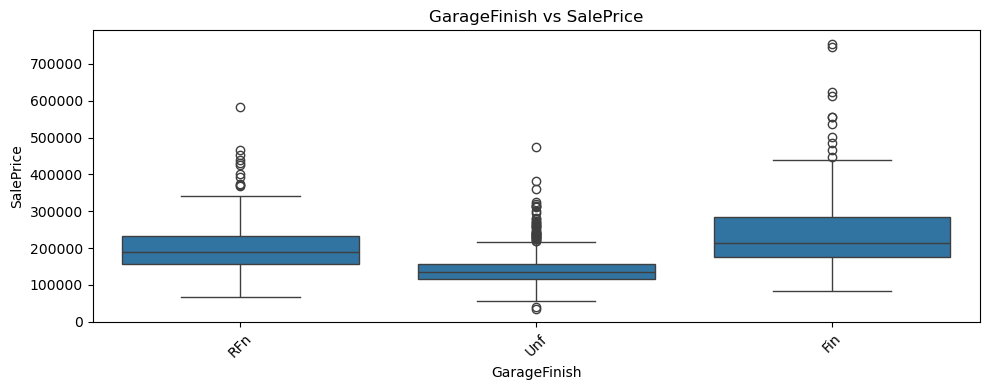

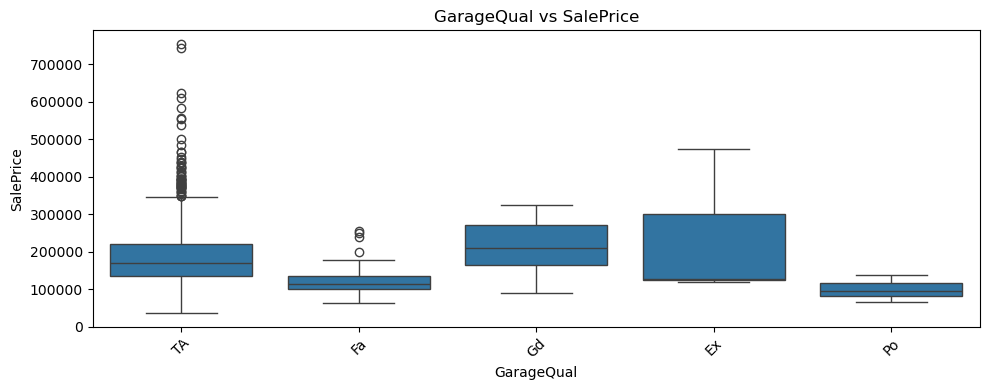

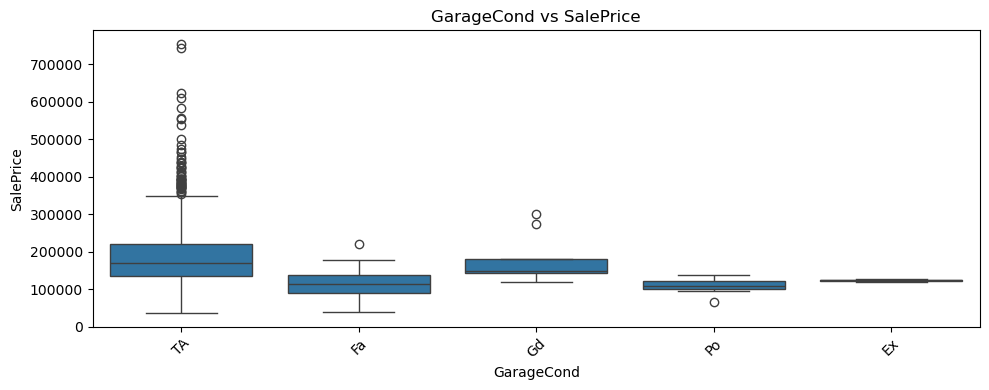

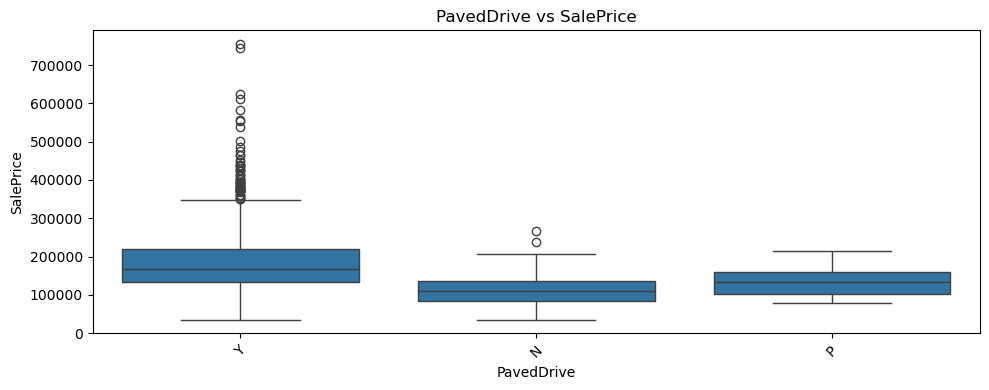

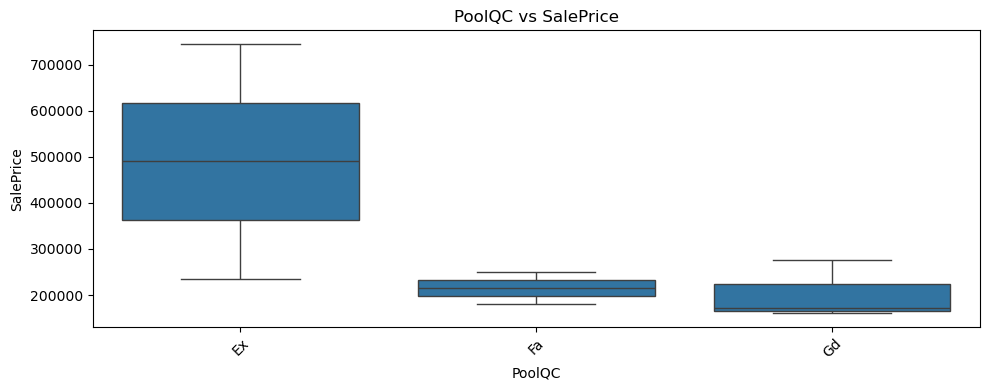

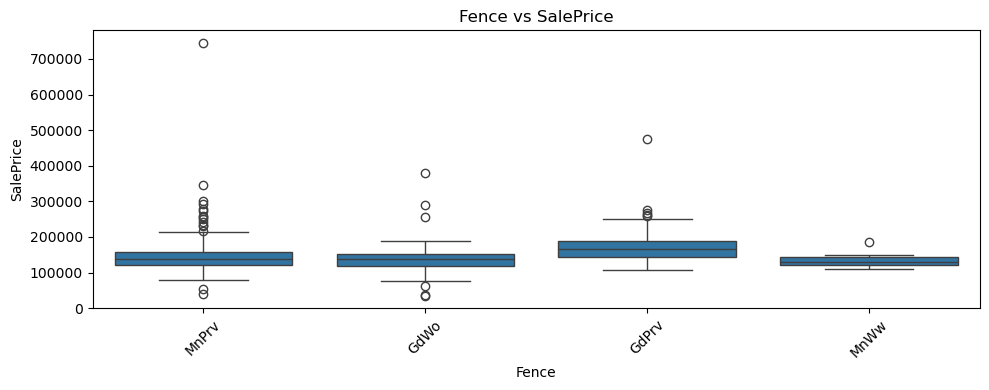

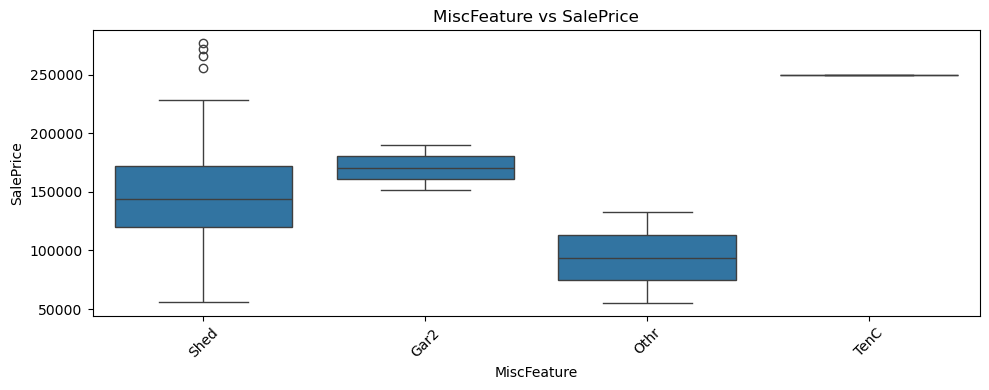

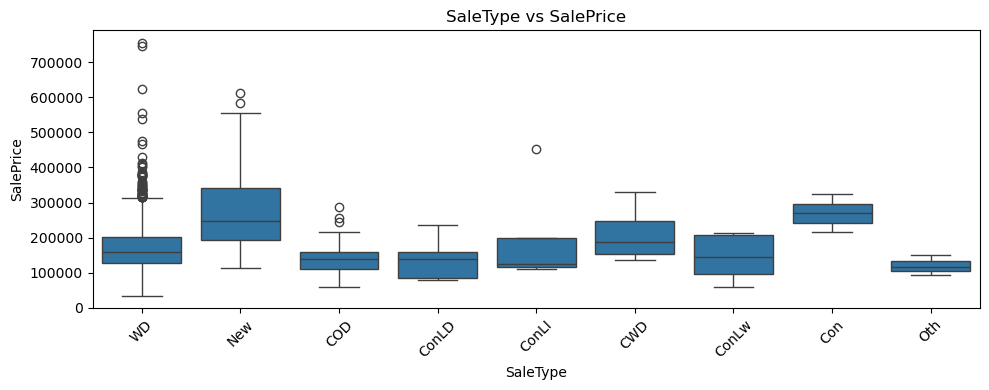

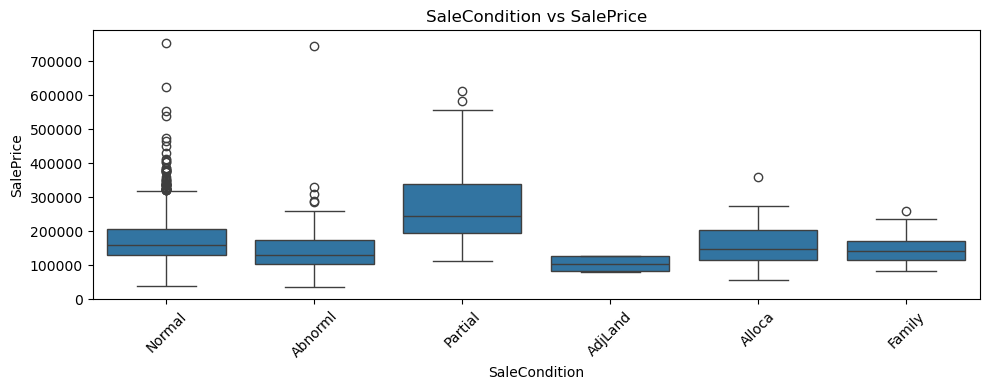

In [16]:


for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df[col], y=df['SalePrice'])
    plt.xticks(rotation=45)
    plt.title(f'{col} vs SalePrice')
    plt.tight_layout()
    plt.show()


## Filling Null Values

In [17]:
# using groupby + tranform 
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)


# Replacing with None

df.fillna({'FireplaceQu': 'None', 'PoolQC': 'None', 'Fence': 'None','Alley':'None'}, inplace=True)


# Basement Related

bsmt_cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
for col in bsmt_cols:
    df[col] = df[col].fillna('NoBsmt')


# Garage Related

garage_cols = ['GarageType','GarageFinish','GarageQual','GarageCond']
for col in garage_cols:
    df[col] = df[col].fillna("NoGarage")
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)


# Masonry Veener

df['MasVnrType'] = df['MasVnrType'].fillna("None")
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)


# Electrical 

df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])



# Outlier Handling 

skew_cols = ['GrLivArea','LotArea','1stFlrSF','TotalBsmtSF']
for col in skew_cols:
    df[col] = np.log1p(df[col])



## Feature Engineering

In [18]:
# Total Bathroom
df['TotalBath'] = df['FullBath'] + (df['HalfBath'] * 0.5) + df['BsmtFullBath'] + (df['BsmtHalfBath'] * 0.5)

# Total House Size (Ground Living area + Basement)
df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']

# Age of the House (Newer House Sell of Higher Price)
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']

# Total Porch Area
df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

# Total Finished Basement
df['FinishedBsmt'] = df['BsmtFinSF1'] + df['BsmtFinSF2']

# HasBeenRemodeled → Yes/No
df["HasBeenRemodeled"] = (df["YearBuilt"] != df["YearRemodAdd"]).astype(int)

# Total Home Quality Score
df["OverallScore"] = df["OverallQual"] + df["OverallCond"]

# Has Garage / Has Basement/ Has Pool 
df["HasGarage"] = (df["GarageArea"] > 0).astype(int)
df["HasBsmt"] = (df["TotalBsmtSF"] > 0).astype(int)
df["HasPool"] = (df["PoolArea"] > 0).astype(int)
# Combine top features to help model capture patterns
df['OverallQual_x_GrLivArea'] = df['OverallQual'] * df['GrLivArea']
df['TotalBsmtSF_x_GrLivArea'] = df['TotalBsmtSF'] * df['GrLivArea']
df['GarageCars_x_GarageArea'] = df['GarageCars'] * df['GarageArea']

## Drop Unusual columns

In [19]:


df.drop('Id',axis=1,inplace=True)


## Encoding Categorical Column

In [20]:

# 2. Auto-detect ordinal columns
ordinal_levels = {
    "ExterQual": ["Po","Fa","TA","Gd","Ex"],
    "ExterCond": ["Po","Fa","TA","Gd","Ex"],
    "BsmtQual": ["Po","Fa","TA","Gd","Ex"],
    "BsmtCond": ["Po","Fa","TA","Gd","Ex"],
    "KitchenQual": ["Po","Fa","TA","Gd","Ex"],
    "HeatingQC": ["Po","Fa","TA","Gd","Ex"],
    "GarageQual": ["Po","Fa","TA","Gd","Ex"],
    "GarageCond": ["Po","Fa","TA","Gd","Ex"],
    "FireplaceQu": ["Po","Fa","TA","Gd","Ex"],
}

ordinal_cols = [col for col in categorical_cols if col in ordinal_levels]

# 3. Apply ordinal encoding
for col in ordinal_cols:
    order = ordinal_levels[col]
    df[col] = df[col].astype(pd.CategoricalDtype(categories=order, ordered=True)).cat.codes

# 4. One-hot encode remaining categorical columns
remaining_cats = [col for col in categorical_cols if col not in ordinal_cols]

df = pd.get_dummies(df, columns=remaining_cats, drop_first=True)

# Converting All bool value in int
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)


## Final Data Prepratation

In [21]:
df['SalePrice'] = np.log(df['SalePrice'])
target = 'SalePrice'


# X = all features except target
X = df.drop(columns=[target])

# y = target
y = df[target]

## Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,         # 20% test
    random_state=42        # ensures reproducibility
)
X_train.shape, X_test.shape

((1168, 244), (292, 244))

## Train Random Forest Model

In [23]:
# rf = RandomForestRegressor(
#     n_estimators=600,
#     max_depth=30,
#     min_samples_split=3,
#     min_samples_leaf=1,
#     max_features="sqrt",
#     random_state=42
# )


# rf.fit(X_train, y_train)


rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [200, 400, 600],
    'max_depth': [20, 30, None],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt','log2']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, scoring='r2', verbose=2)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 600}


## Predict

In [24]:
y_pred_train = best_rf.predict(X_train)
y_pred_test = best_rf.predict(X_test)

## Evaluate the Mode

In [25]:
print('\n--- Model Evaluation ---')
print('Train R²:', r2_score(y_train, y_pred_train))
print('Test R²:', r2_score(y_test, y_pred_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))



--- Model Evaluation ---
Train R²: 0.9834479955139868
Test R²: 0.8778375482930236
RMSE: 0.15098730049519865


In [27]:
rmse_original = np.exp(0.15098730049519865) - 1
print(rmse_original)


0.16298188869395913


Now We'd done predicting and our model do absoulty perfect accuracy 

#### TOP FEATURES (from typical House Prices dataset) :

* Due to our encoding + transformations, these will likely be our highest:
* OverallQual (quality of materials & finish)
* GrLivArea (above-ground living area)
* GarageCars
* TotalBsmtSF
* 1stFlrSF
* YearBuilt / YearRemodAdd
These match real-world intuition too.

## Feature Importance (Random Forest)

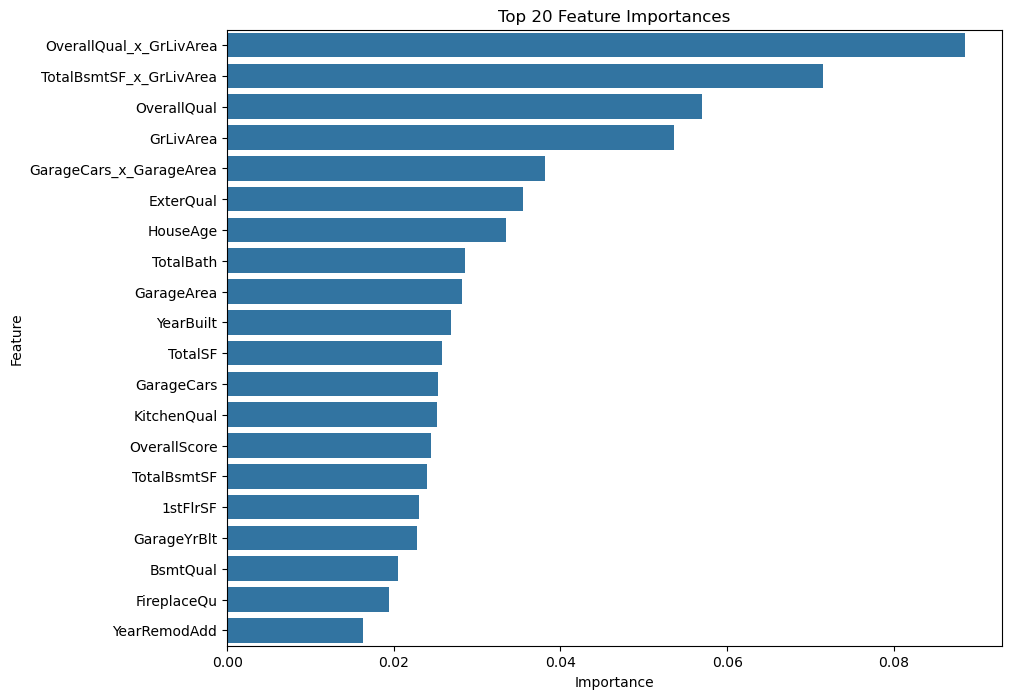

                    Feature  Importance
56  OverallQual_x_GrLivArea    0.088572
57  TotalBsmtSF_x_GrLivArea    0.071497
3               OverallQual    0.056993
20                GrLivArea    0.053605
58  GarageCars_x_GarageArea    0.038150
8                 ExterQual    0.035535
47                 HouseAge    0.033458
45                TotalBath    0.028569
33               GarageArea    0.028143
5                 YearBuilt    0.026920
46                  TotalSF    0.025733
32               GarageCars    0.025243
27              KitchenQual    0.025192
52             OverallScore    0.024473
15              TotalBsmtSF    0.023999
17                 1stFlrSF    0.023048
31              GarageYrBlt    0.022760
10                 BsmtQual    0.020513
30              FireplaceQu    0.019412
6              YearRemodAdd    0.016329


In [28]:
importances = best_rf.feature_importances_
feat_names = X_train.columns

fi = pd.DataFrame({
    "Feature": feat_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).head(20)

# Plot top 20 features
plt.figure(figsize=(10,8))
sns.barplot(x=fi['Importance'], y=fi['Feature'])
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Display table
print(fi)

### Observation

#### 1
* OverallQual_x_GrLivArea (0.088) -> interaction of quality × living area is now the **top feature**.
* Shows that high quality in larger houses strongly boosts price.
* Features with very low importance can still be considered for dropping if simplifying the model.
* Helps identify which patterns the model relies on; if overfitting occurs, we might reduce less important features.

#### 2
* TotalBsmtSF_x_GrLivArea (0.072) -> second most important interaction feature.
* Indicates that a larger basement in combination with living area significantly affects price.
* Interaction features are helping the model detect combined effects that single features miss.

#### 3
* OverallQual (0.057)
* Still very important on its own -> house quality alone strongly influences price.
* High-quality materials and finish continue to be major predictors.
* Even with average size, high quality boosts price significantly.

#### 4
* GrLivArea (0.054)
* Above-ground living area
* Second-biggest single feature
* More living space = higher price; interaction features now complement this effect.

#### 5
* GarageCars_x_GarageArea (0.038)
* Interaction shows both number of cars and garage size matter together.
* Bigger + more functional garages increase price more than either feature alone.

#### 6
* ExterQual (0.036) & HouseAge (0.033)
* External quality of the house and newer houses still influence pricing.
* Quality features remain crucial in valuation.

#### 7
* TotalBath (0.029), GarageArea (0.028), KitchenQual (0.025)
* Bathrooms, garage size, and kitchen quality continue to add value.
* Confirms that amenities and functional features impact price.

#### 8
* TotalBsmtSF, 1stFlrSF, GarageCars
* Basement size, first floor area, and garage capacity add property value.
* Overall house size remains an important theme.

#### 9
* FireplaceQu (0.019), YearRemodAdd (0.016)
* Fireplace quality and recent remodeling still positively influence price.


#### What's this mean Overall ?
* House quality + total usable area (living + basement + garage) = maximum influence on SalePrice.

# Conclusion
This project applied EDA and machine learning to predict housing prices using the Ames dataset.
Models can be further improved using hyperparameter tuning and advanced algorithms.
